In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
plt.style.use("ggplot")

In [2]:
ipma=pd.read_csv("IPMA_Dados_Limpos_Final.csv",sep=",",parse_dates=["Data de colheita"])
pnca=pd.read_excel("Dados_Bivalves_PNCA_Limpos_Final.xlsx", parse_dates=["Data Colheita"])

In [3]:
pnca.head()

,Unnamed: 0,Nr. Amostra,Tipo de Amostra,Espécie,Parâmetro,Res.Trat.,Unidade,Data Colheita
0,0,1803338,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"1,2",mg/kg,2018-05-16
1,1,1306508,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,1",mg/kg,2013-10-01
2,2,1400840,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,0",mg/kg,2014-02-04
3,3,1803334,Mexilhão,Mexilhão,Chumbo (LFQ),"0,95",mg/kg,2018-05-15
4,4,1803332,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"0,8",mg/kg,2018-05-15


In [4]:
pnca.drop(columns=["Unnamed: 0","Nr. Amostra"],inplace=True)

In [5]:
pnca.head()

,Tipo de Amostra,Espécie,Parâmetro,Res.Trat.,Unidade,Data Colheita
0,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"1,2",mg/kg,2018-05-16
1,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,1",mg/kg,2013-10-01
2,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,0",mg/kg,2014-02-04
3,Mexilhão,Mexilhão,Chumbo (LFQ),"0,95",mg/kg,2018-05-15
4,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"0,8",mg/kg,2018-05-15


In [6]:
ipma.head()

,Unnamed: 0,Nº Amostra,Data de colheita,Zona de\nProdução,Local,Espécie,Pb\n(mg/kg)
0,0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01
1,4,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26
2,5,1324/22,2022-12-19,EMN ZN,Ponto 3 N,Berbigão,0.19
3,8,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01
4,9,1282/22,2022-11-30,L7c2,Offshore MS1,Vieira,0.08


In [7]:
ipma.drop(columns=["Unnamed: 0","Zona de\nProdução", "Nº Amostra"],inplace=True)

# Padronizar estruturas de ambas as dataset

Ficar com as colunas:
>Nº Amostra

>Data de colheita

>Espécie

>Pb (mg/kg)

__PNCA dataset__

In [8]:
pnca.head()

,Tipo de Amostra,Espécie,Parâmetro,Res.Trat.,Unidade,Data Colheita
0,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"1,2",mg/kg,2018-05-16
1,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,1",mg/kg,2013-10-01
2,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,0",mg/kg,2014-02-04
3,Mexilhão,Mexilhão,Chumbo (LFQ),"0,95",mg/kg,2018-05-15
4,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"0,8",mg/kg,2018-05-15


In [9]:
pnca.drop(columns=["Tipo de Amostra","Parâmetro","Unidade"],inplace=True)
pnca.head()

,Espécie,Res.Trat.,Data Colheita
0,Amêijoa-vietnamita,"1,2",2018-05-16
1,Lambujinha,"1,1",2013-10-01
2,Lambujinha,"1,0",2014-02-04
3,Mexilhão,"0,95",2018-05-15
4,Amêijoa-vietnamita,"0,8",2018-05-15


In [10]:
print(pnca.columns)

Index(['Espécie', 'Res.Trat.', 'Data Colheita'], dtype='object')


In [11]:
pnca=pnca.rename(columns={'Nr. Amostra':'Nº Amostra','Data Colheita':'Data de colheita', 'Res.Trat.':'Pb (mg/kg)'})

In [12]:
pnca.head()

,Espécie,Pb (mg/kg),Data de colheita
0,Amêijoa-vietnamita,"1,2",2018-05-16
1,Lambujinha,"1,1",2013-10-01
2,Lambujinha,"1,0",2014-02-04
3,Mexilhão,"0,95",2018-05-15
4,Amêijoa-vietnamita,"0,8",2018-05-15


In [13]:
pnca=pnca[["Data de colheita","Espécie","Pb (mg/kg)"]]
pnca.head()

,Data de colheita,Espécie,Pb (mg/kg)
0,2018-05-16,Amêijoa-vietnamita,"1,2"
1,2013-10-01,Lambujinha,"1,1"
2,2014-02-04,Lambujinha,"1,0"
3,2018-05-15,Mexilhão,"0,95"
4,2018-05-15,Amêijoa-vietnamita,"0,8"


__IPMA dataset__

In [14]:
ipma.head()

,Data de colheita,Local,Espécie,Pb\n(mg/kg)
0,2023-01-30,Roncanito,Ostra-portuguesa,0.01
1,2023-01-10,Vagem da Cana Verde,Ostra-portuguesa,0.26
2,2022-12-19,Ponto 3 N,Berbigão,0.19
3,2022-12-12,Roncanito,Ostra-portuguesa,0.01
4,2022-11-30,Offshore MS1,Vieira,0.08


In [15]:
ipma.drop(columns=["Local"],inplace=True)
ipma.head()

,Data de colheita,Espécie,Pb\n(mg/kg)
0,2023-01-30,Ostra-portuguesa,0.01
1,2023-01-10,Ostra-portuguesa,0.26
2,2022-12-19,Berbigão,0.19
3,2022-12-12,Ostra-portuguesa,0.01
4,2022-11-30,Vieira,0.08


In [16]:
print(ipma.columns)

Index(['Data de colheita', 'Espécie', 'Pb\n(mg/kg)'], dtype='object')


In [17]:
print(pnca.columns)

Index(['Data de colheita', 'Espécie', 'Pb (mg/kg)'], dtype='object')


In [18]:
ipma.rename(columns={'Nº Amostra':'Nº Amostra','Pb\n(mg/kg)': 'Pb (mg/kg)'},inplace=True)
ipma.head()

,Data de colheita,Espécie,Pb (mg/kg)
0,2023-01-30,Ostra-portuguesa,0.01
1,2023-01-10,Ostra-portuguesa,0.26
2,2022-12-19,Berbigão,0.19
3,2022-12-12,Ostra-portuguesa,0.01
4,2022-11-30,Vieira,0.08


In [19]:
pnca.head()

,Data de colheita,Espécie,Pb (mg/kg)
0,2018-05-16,Amêijoa-vietnamita,"1,2"
1,2013-10-01,Lambujinha,"1,1"
2,2014-02-04,Lambujinha,"1,0"
3,2018-05-15,Mexilhão,"0,95"
4,2018-05-15,Amêijoa-vietnamita,"0,8"


# Dataset IPMA:

> Variação da [Pb] por espécie

> Quais as espécies com que posso trabalhar?

In [20]:
ipma

,Data de colheita,Espécie,Pb (mg/kg)
0,2023-01-30,Ostra-portuguesa,0.01
1,2023-01-10,Ostra-portuguesa,0.26
2,2022-12-19,Berbigão,0.19
3,2022-12-12,Ostra-portuguesa,0.01
4,2022-11-30,Vieira,0.08
...,...,...,...
1672,2014-11-05,Ostra-portuguesa,0.34
1673,2014-10-29,Ostra-portuguesa,0.28
1674,2014-10-27,Berbigão,0.41
1675,2014-10-22,Ostra-portuguesa,0.09


In [21]:
ipma["Pb (mg/kg)"]=ipma["Pb (mg/kg)"].str.replace(",",".")
ipma["Pb (mg/kg)"]=pd.to_numeric(ipma["Pb (mg/kg)"])

In [22]:
skim(ipma)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1677   │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)         │    0 │       0 │    0.32 │    0.61 │    0.01 │    0.09 │    0.25 │     5.6 │    █     │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2014-10-06     │    2023-01-30     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Espécie                   │       0 │          0 │                            1 │                     1700 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Dataset PNCA:

> Variação da [Pb] por espécie

> Quais as espécies com que posso trabalhar?

In [23]:
pnca

,Data de colheita,Espécie,Pb (mg/kg)
0,2018-05-16,Amêijoa-vietnamita,"1,2"
1,2013-10-01,Lambujinha,"1,1"
2,2014-02-04,Lambujinha,"1,0"
3,2018-05-15,Mexilhão,"0,95"
4,2018-05-15,Amêijoa-vietnamita,"0,8"
...,...,...,...
96,2019-02-05,Amêijoa-japonesa,0.04
97,2015-06-09,Amêijoa-branca,0.04
98,2015-06-09,Amêijoa-boa,0.04
99,2016-07-22,Mexilhão,0.04


In [24]:
pnca["Pb (mg/kg)"]=pnca["Pb (mg/kg)"].str.replace(",",".")
pnca["Pb (mg/kg)"]=pd.to_numeric(pnca["Pb (mg/kg)"])

In [25]:
skim(pnca)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 101    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Pb (mg/kg)         │    0 │       0 │    0.26 │    0.23 │    0.04 │    0.1 │    0.35 │     1.2 │    █▃▁    │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2013-10-01     │    2021-12-10     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Espécie                   │       0 │          0 │                            1 │                      100 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# PNCA(retalho) vs IPMA(moluscos bivalves vivos)

__Unir ambas as dataset PNCA e IPMA__

Juntar ambas as datasets e criar uma coluna "Controlo" que diga se o dado é proveniente da dataset PNCA ou IPMA

In [26]:
pd.concat([pnca,ipma],axis=0,keys=["PNCA","IPMA"],names=["Controlo"])

Data de colheita             Espécie  Pb (mg/kg)
Controlo                                                      
PNCA     0          2018-05-16  Amêijoa-vietnamita        1.20
         1          2013-10-01          Lambujinha        1.10
         2          2014-02-04          Lambujinha        1.00
         3          2018-05-15            Mexilhão        0.95
         4          2018-05-15  Amêijoa-vietnamita        0.80
...                        ...                 ...         ...
IPMA     1672       2014-11-05    Ostra-portuguesa        0.34
         1673       2014-10-29    Ostra-portuguesa        0.28
         1674       2014-10-27            Berbigão        0.41
         1675       2014-10-22    Ostra-portuguesa        0.09
         1676       2014-10-06          Lambujinha        2.20

[1778 rows x 3 columns]

In [27]:
data=pd.concat([pnca,ipma],axis=0,keys=["PNCA","IPMA"],names=["Controlo"]).reset_index()
data

,Controlo,level_1,Data de colheita,Espécie,Pb (mg/kg)
0,PNCA,0,2018-05-16,Amêijoa-vietnamita,1.20
1,PNCA,1,2013-10-01,Lambujinha,1.10
2,PNCA,2,2014-02-04,Lambujinha,1.00
3,PNCA,3,2018-05-15,Mexilhão,0.95
4,PNCA,4,2018-05-15,Amêijoa-vietnamita,0.80
...,...,...,...,...,...
1773,IPMA,1672,2014-11-05,Ostra-portuguesa,0.34
1774,IPMA,1673,2014-10-29,Ostra-portuguesa,0.28
1775,IPMA,1674,2014-10-27,Berbigão,0.41
1776,IPMA,1675,2014-10-22,Ostra-portuguesa,0.09


In [28]:
data.drop(columns=["level_1"],inplace=True)

In [29]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1778   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Pb (mg/kg)         │    0 │       0 │    0.31 │    0.6 │    0.01 │    0.09 │    0.25 │     5.6 │     █     │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2013-10-01     │    2023-01-30     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Controlo                  │       0 │          0 │                            1 │                     1800 │  │
│ │ Espécie                   │       0 │          0 │                            1 │                     1800 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

__Ver Nº de Inconformidades__

Tendo em consideração que o limite legal de Pb(Chumbo) em moluscos bivalves é de 1.5 mg/kg, vamos criar uma coluna "Observações", que indica se a respetiva amostra encontra-se conforme, caso a sua concentração de chumbo "P b(mg/kg)" esteja abaixo do limite legal, ou não conforme, caso apresente um valore de "Pb (mg/kg)" superior ou igual a 1.5 mg/kg

In [30]:
data.head()

,Controlo,Data de colheita,Espécie,Pb (mg/kg)
0,PNCA,2018-05-16,Amêijoa-vietnamita,1.20
1,PNCA,2013-10-01,Lambujinha,1.10
2,PNCA,2014-02-04,Lambujinha,1.00
3,PNCA,2018-05-15,Mexilhão,0.95
4,PNCA,2018-05-15,Amêijoa-vietnamita,0.80


In [31]:
data["Observações"]=np.where(data["Pb (mg/kg)"]>=1.5,"Não Conforme","Conforme")
data

,Controlo,Data de colheita,Espécie,Pb (mg/kg),Observações
0,PNCA,2018-05-16,Amêijoa-vietnamita,1.20,Conforme
1,PNCA,2013-10-01,Lambujinha,1.10,Conforme
2,PNCA,2014-02-04,Lambujinha,1.00,Conforme
3,PNCA,2018-05-15,Mexilhão,0.95,Conforme
4,PNCA,2018-05-15,Amêijoa-vietnamita,0.80,Conforme
...,...,...,...,...,...
1773,IPMA,2014-11-05,Ostra-portuguesa,0.34,Conforme
1774,IPMA,2014-10-29,Ostra-portuguesa,0.28,Conforme
1775,IPMA,2014-10-27,Berbigão,0.41,Conforme
1776,IPMA,2014-10-22,Ostra-portuguesa,0.09,Conforme


In [32]:
data["Observações"].value_counts()

Conforme        1698
Não Conforme      80
Name: Observações, dtype: int64

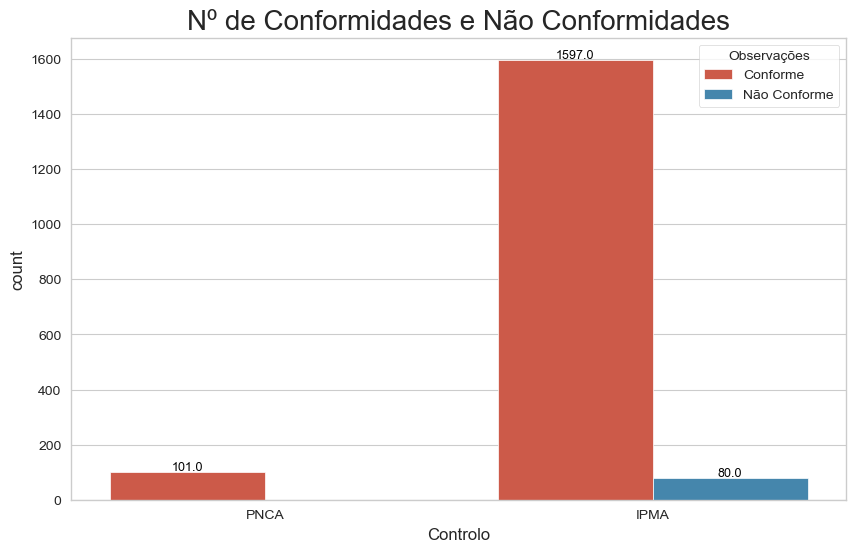

In [33]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plot=sns.countplot(x="Controlo",hue="Observações",data=data)
plt.title("Nº de Conformidades e Não Conformidades", fontsize=20)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=9,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.show()

In [34]:
não_conforme=data[data["Observações"] == "Não Conforme"]
não_conforme

,Controlo,Data de colheita,Espécie,Pb (mg/kg),Observações
360,IPMA,2022-01-18,Lambujinha,2.0,Não Conforme
408,IPMA,2021-10-19,Lambujinha,1.5,Não Conforme
455,IPMA,2021-09-20,Lambujinha,3.3,Não Conforme
503,IPMA,2021-08-11,Lambujinha,3.6,Não Conforme
522,IPMA,2021-06-23,Lambujinha,3.3,Não Conforme
...,...,...,...,...,...
1741,IPMA,2015-03-09,Lambujinha,2.8,Não Conforme
1760,IPMA,2015-02-19,Lambujinha,1.9,Não Conforme
1764,IPMA,2015-01-20,Lambujinha,3.8,Não Conforme
1766,IPMA,2014-12-09,Lambujinha,3.0,Não Conforme


In [35]:
não_conforme["Espécie"].value_counts()

Lambujinha          78
Castanhola           1
Amêijoa-japonesa     1
Name: Espécie, dtype: int64

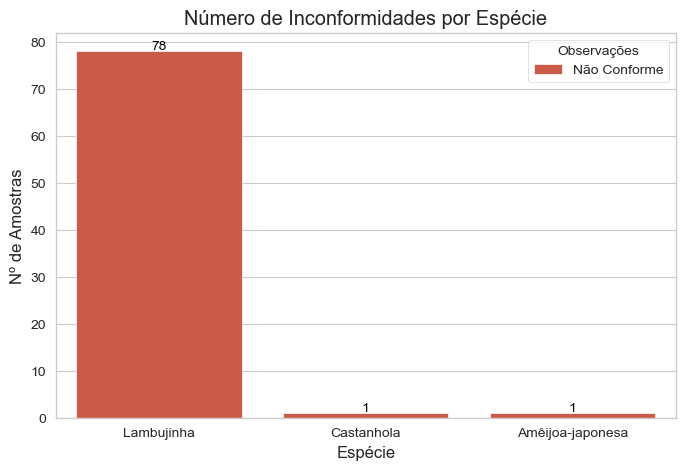

In [36]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
plot=sns.countplot(x="Espécie",hue="Observações",data=não_conforme)
plt.ylabel("Nº de Amostras")
plt.title("Número de Inconformidades por Espécie")
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=10,
                  color="black",xytext=(0,1),
                  textcoords="offset points")
plt.show()

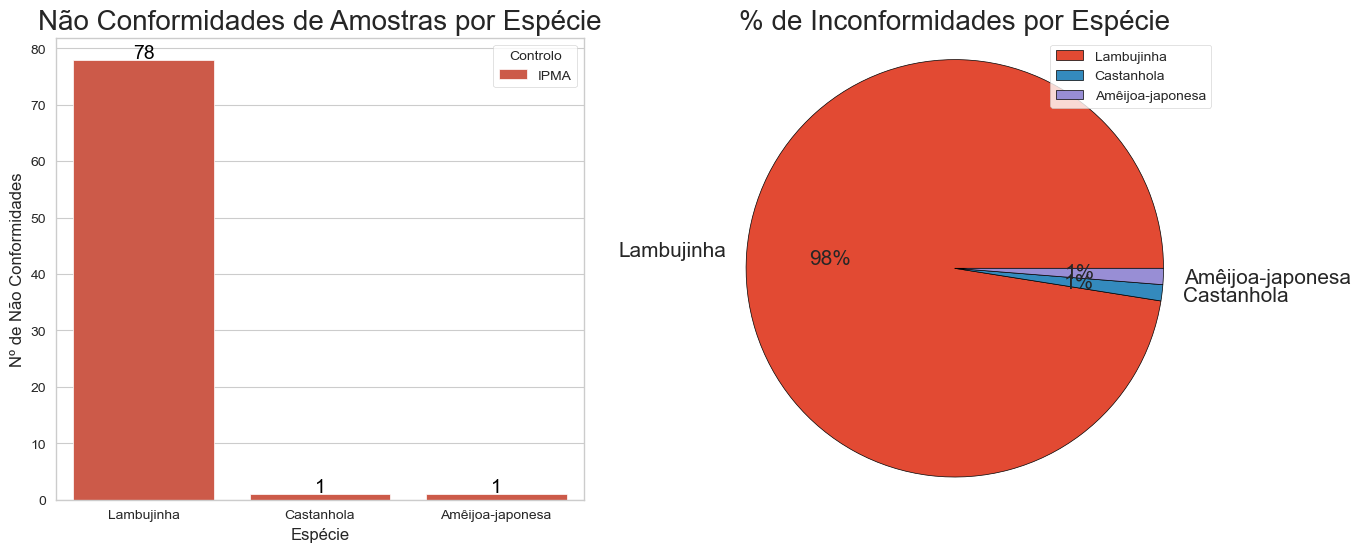

In [37]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot=sns.countplot(x="Espécie",hue="Controlo",data=não_conforme)
plt.xlabel("Espécie")
plt.ylabel("Nº de Não Conformidades")
plt.title("Não Conformidades de Amostras por Espécie",fontsize=20)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=14,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.subplot(1, 2, 2)
plt.pie(não_conforme["Espécie"].value_counts().values, 
        labels = list(não_conforme["Espécie"].value_counts().index),  
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15},
        autopct='%1.0f%%',
        explode=[0.0,0.0,0.0]
        )
plt.axis("equal")
plt.title("% de Inconformidades por Espécie",fontsize=20)
plt.legend()

__Calcular Media, Desvio Padrão, Máximo e Mínimo de Concontração de Chumbo para ambos os casos, PNCA e IPMA__

Por Depuração Efetuada ou Não Efetuada:

In [38]:
data.groupby(["Controlo"]).agg(Nº_de_Amostra=("Espécie","count"),
                                Média_Pb=("Pb (mg/kg)","mean"),
                                Desvio_Padrão_Pb=("Pb (mg/kg)","std"),
                                Máximo_Pb=("Pb (mg/kg)","max"),
                                Minimo_Pb=("Pb (mg/kg)","min"))

,No_de_Amostra,Média_Pb,Desvio_Padrão_Pb,Máximo_Pb,Minimo_Pb
Controlo,,,,,
IPMA,1677,0.317060,0.613609,5.6,0.01
PNCA,101,0.258218,0.232854,1.2,0.04


Por Depuração ou Não Depuração e Espécie:

In [39]:
data_analise=data.groupby(["Controlo","Espécie"]).agg(Nº_de_Amostra=("Espécie","count"),
                                Média_Pb=("Pb (mg/kg)","mean"),
                                Desvio_Padrão_Pb=("Pb (mg/kg)","std"),
                                Máximo_Pb=("Pb (mg/kg)","max"),
                                Minimo_Pb=("Pb (mg/kg)","min"))
data_analise

No_de_Amostra  Média_Pb  Desvio_Padrão_Pb  \
Controlo Espécie                                                         
IPMA     Amêijoa-boa                   204  0.092892          0.059819   
         Amêijoa-branca                 71  0.130563          0.087764   
         Amêijoa-cão                     4  0.075000          0.043589   
         Amêijoa-japonesa              153  0.228562          0.190644   
         Amêijoa-macha                  48  0.095833          0.137513   
         Amêijoa-relógio                 9  0.901111          0.320992   
         Amêijola                       15  0.086000          0.044369   
         Berbigão                      136  0.280000          0.226925   
         Castanhola                     28  0.441071          0.262415   
         Conquilha                      53  0.132075          0.068735   
         Lambujinha                    152  1.817566          1.193698   
         Longueirão                     72  0.143889          0.097844   
         Mexilhão                      227  0.190881          0.121094   
         Ostra-japonesa                237  0.126160          0.055678   
         Ostra-plana                    31  0.090968          0.050686   
         Ostra-portuguesa              210  0.114857          0.067272   
         Pé-de-burrinho                  6  0.031667          0.033714   
         Pé-de-burro                    15  0.510000          0.328155   
         Taralhão                        2  0.555000          0.417193   
         Vieira                          4  0.260000          0.141421   
PNCA     Amêijoa-boa                     4  0.062500          0.045000   
         Amêijoa-branca                  7  0.094286          0.078285   
         Amêijoa-japonesa               13  0.088462          0.065682   
         Amêijoa-vietnamita             31  0.398387          0.221977   
         Amêijoa-zebra                   2  0.315000          0.233345   
         Berbigão                        2  0.285000          0.162635   
         Castanholas                     1  0.260000               NaN   
         Lambujinha                      2  1.050000          0.070711   
         Longueirão                      2  0.210000          0.240416   
         Mexilhão                       22  0.222273          0.210734   
         Ostra                          15  0.186667          0.073840   

                             Máximo_Pb  Minimo_Pb  
Controlo Espécie                                   
IPMA     Amêijoa-boa              0.27       0.01  
         Amêijoa-branca           0.41       0.01  
         Amêijoa-cão              0.10       0.01  
         Amêijoa-japonesa         1.50       0.01  
         Amêijoa-macha            0.90       0.01  
         Amêijoa-relógio          1.40       0.51  
         Amêijola                 0.15       0.01  
         Berbigão                 1.40       0.01  
         Castanhola               1.60       0.17  
         Conquilha                0.33       0.01  
         Lambujinha               5.60       0.01  
         Longueirão               0.38       0.01  
         Mexilhão                 0.66       0.01  
         Ostra-japonesa           0.34       0.01  
         Ostra-plana              0.28       0.01  
         Ostra-portuguesa         0.36       0.01  
         Pé-de-burrinho           0.08       0.01  
         Pé-de-burro              1.30       0.11  
         Taralhão                 0.85       0.26  
         Vieira                   0.40       0.08  
PNCA     Amêijoa-boa              0.13       0.04  
         Amêijoa-branca           0.22       0.04  
         Amêijoa-japonesa         0.27       0.04  
         Amêijoa-vietnamita       1.20       0.04  
         Amêijoa-zebra            0.48       0.15  
         Berbigão                 0.40       0.17  
         Castanholas              0.26       0.26  
         Lambujinha               1.10       1.00  
         Longueirão       

## Conclusões

__(IPMA) amostras recolhidas para determinar as zonas de produção, moluscos bivalves vivos vs (PNCA) amostras recolhidas no retalho__

>IPMA (apresentam um maior número muito maior de inconformidades, destacando-se a lambujinha;

>IPMA apresentam em média uma concentração de chumbo superior, apresentando um valor de 0.316481+/-0.612212 mg/kg. PNCA apresentam em media uma concentração de chumbo de 0.258218+/-0.232854 (mg/kg)

>De todas as espécies destaca-se a lambujinha com uma maior [Pb] média, tanto no caso das amostras do PNCA e do IPMA, apresentando um valor de 1.050000 +/- 0.070711 e de 1.817566 +/- 1.193698, respetivamente

> De acodro com o número de amostras será apenas analisado as espécies: ostra, mexilhão, amêijoa-boa, amêijoa-japonesa e berbigão, no caso do IPMA. No que toca aos dados do PNCA será apenas realizada uma avaliação de risco para a amêijoa-vietnamita.

# IPMA (Moluscos Bivalves Vivos)

> Esta dataset refere-se aos moluscos bivalves, recolhidos no âmbito do plano de monitorização de moluscos bivalves do IPMA

In [40]:
ipma=pd.read_csv("IPMA_Dados_Limpos_Final.csv",sep=",",parse_dates=["Data de colheita"])

In [41]:
ipma.drop(columns=["Unnamed: 0"],inplace=True)

In [42]:
ipma.rename(columns={'Nº Amostra':'Nº Amostra',"Zona de\nProdução": "Zona de Produção", 'Pb\n(mg/kg)': 'Pb (mg/kg)'},inplace=True)
ipma["Pb (mg/kg)"]=ipma["Pb (mg/kg)"].str.replace(",",".")
ipma["Pb (mg/kg)"]=pd.to_numeric(ipma["Pb (mg/kg)"])

In [43]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg)
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26
2,1324/22,2022-12-19,EMN ZN,Ponto 3 N,Berbigão,0.19
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01
4,1282/22,2022-11-30,L7c2,Offshore MS1,Vieira,0.08


In [44]:
ipma["Observações"]=np.where(ipma["Pb (mg/kg)"]>=1.5,"Não Conforme","Conforme")

In [45]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme
2,1324/22,2022-12-19,EMN ZN,Ponto 3 N,Berbigão,0.19,Conforme
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
4,1282/22,2022-11-30,L7c2,Offshore MS1,Vieira,0.08,Conforme


__Nº de Amostras por Espécie__

> Verificar quais as espécies com maior número de amostras para que seja possível realizar uma análise mais detalhada das mesmas

In [46]:
ipma_amostras=ipma.groupby("Espécie").agg(N=("Espécie","count"))
ipma_amostras

,N
Espécie,
Amêijoa-boa,204
Amêijoa-branca,71
Amêijoa-cão,4
Amêijoa-japonesa,153
Amêijoa-macha,48
Amêijoa-relógio,9
Amêijola,15
Berbigão,136
Castanhola,28


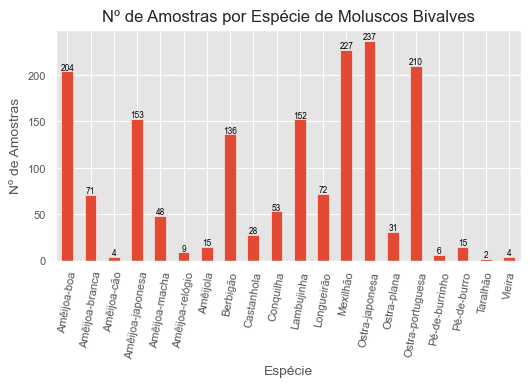

In [47]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=ipma_amostras["N"].plot(kind="bar")

plt.title("Nº de Amostras por Espécie de Moluscos Bivalves",fontsize=12)
plt.ylabel("Nº de Amostras",fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel("Espécie",fontsize=10)
plt.xticks(fontsize=8,rotation=80)

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=6,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.show()

Ao analisar a figura acima podemos verificar que as espécies com um maior número de amostras recolhidas pelo IPMA, no âmbito do plano de monitorização de metais contaminantes em moluscos  bivalves (2013-janeiro 2023) foram as espécies: Ostra-japonesa, Mexilhão, Ostra-portuguesa, Amêijoa-boa, Amêijoa-japonesa e Lambujinha, pelo que se decidiu estudar as espécies referidas anteriormente

__Limpeza de Dados__

>Limpar dados das espécies que não as referidas anteriomente

In [48]:
# Amêijoa-branca
ajbranca=ipma[ipma["Espécie"]=="Amêijoa-branca"]
ajbranca

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações
68,950/22,2022-09-13,L9,Praia de Monte Gordo,Amêijoa-branca,0.10,Conforme
82,910/22,2022-09-07,L3,Torreira,Amêijoa-branca,0.12,Conforme
83,911/22,2022-09-07,L1,Labruge,Amêijoa-branca,0.13,Conforme
84,912/22,2022-09-07,L2,Aguda,Amêijoa-branca,0.09,Conforme
91,923/22,2022-09-07,L6,Comporta,Amêijoa-branca,0.06,Conforme
...,...,...,...,...,...,...,...
1562,14292,2015-09-09,L3,Torreira,Amêijoa-branca,0.06,Conforme
1582,14255,2015-09-01,L2,Aguda,Amêijoa-branca,0.01,Conforme
1583,14256,2015-09-01,L1,Labruje,Amêijoa-branca,0.10,Conforme
1623,13569,2015-03-16,L3,Torreira,Amêijoa-branca,0.18,Conforme


In [49]:
ipma.drop(ajbranca.index,inplace=True)

In [50]:
ipma[ipma["Espécie"]=="Amêijoa-branca"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [51]:
# Amêijoa-cão
ajcao=ipma[ipma["Espécie"]=="Amêijoa-cão"]
ajcao

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações
71,953/22,2022-09-13,OLH2,Fortaleza 1,Amêijoa-cão,0.10,Conforme
163,320/22,2022-04-18,OLH2,Fortaleza 1,Amêijoa-cão,0.01,Conforme
336,882/21,2021-09-27,OLH2,Fortaleza,Amêijoa-cão,0.09,Conforme
454,321/21,2021-03-29,OLH2,Fortaleza,Amêijoa-cão,0.10,Conforme


In [52]:
ipma.drop(ajcao.index,inplace=True)

In [53]:
ipma[ipma["Espécie"]=="Amêijoa-cão"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [54]:
# Amêijoa-macha
ipma[ipma["Espécie"]=="Amêijoa-macha"]
ipma.drop(ipma[ipma["Espécie"]=="Amêijoa-macha"].index, inplace=True)

In [55]:
ipma[ipma["Espécie"]=="Amêijoa-macha"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [56]:
# Amêijoa-relógio
ipma[ipma["Espécie"]=="Amêijoa-relógio"]
ipma.drop(ipma[ipma["Espécie"]=="Amêijoa-relógio"].index,inplace=True)

In [57]:
ipma[ipma["Espécie"]=="Amêijoa-relógio"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [58]:
# Amêijola
ipma[ipma["Espécie"]=="Amêijola"]
ipma.drop(ipma[ipma["Espécie"]=="Amêijola"].index,inplace=True)
ipma[ipma["Espécie"]=="Amêijola"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [59]:
# Castanhola
ipma[ipma["Espécie"]=="Castanhola"]
ipma.drop(ipma[ipma["Espécie"]=="Castanhola"].index,inplace=True)
ipma[ipma["Espécie"]=="Castanhola"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [60]:
# Conquilha
ipma[ipma["Espécie"]=="Conquilha"]
ipma.drop(ipma[ipma["Espécie"]=="Conquilha"].index,inplace=True)
ipma[ipma["Espécie"]=="Conquilha"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [61]:
# Longueirão
ipma[ipma["Espécie"]=="Longueirão"]
ipma.drop(ipma[ipma["Espécie"]=="Longueirão"].index,inplace=True)
ipma[ipma["Espécie"]=="Longueirão"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [62]:
# Pé-de-burrinho
ipma[ipma["Espécie"]=="Pé-de-burrinho"]
ipma.drop(ipma[ipma["Espécie"]=="Pé-de-burrinho"].index,inplace=True)
ipma[ipma["Espécie"]=="Pé-de-burrinho"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [63]:
# Pé-de-burro
ipma[ipma["Espécie"]=="Pé-de-burro"]
ipma.drop(ipma[ipma["Espécie"]=="Pé-de-burro"].index,inplace=True)
ipma[ipma["Espécie"]=="Pé-de-burro"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [64]:
# Taralhão
ipma[ipma["Espécie"]=="Taralhão"]
ipma.drop(ipma[ipma["Espécie"]=="Taralhão"].index,inplace=True)
ipma[ipma["Espécie"]=="Taralhão"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [65]:
# Vieira
ipma[ipma["Espécie"]=="Vieira"]
ipma.drop(ipma[ipma["Espécie"]=="Vieira"].index,inplace=True)
ipma[ipma["Espécie"]=="Vieira"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [66]:
# Berbigão
ipma[ipma["Espécie"]=="Berbigão"]
ipma.drop(ipma[ipma["Espécie"]=="Berbigão"].index,inplace=True)
ipma[ipma["Espécie"]=="Berbigão"]

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações


In [67]:
# Ostra-plana
ostraplana=ipma[ipma["Espécie"]=="Ostra-plana"]
ipma.drop(ostraplana.index,inplace=True)

__[Pb] por Espécie em Estudo__

In [68]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme


In [69]:
ipma_esp=ipma.groupby("Espécie").agg(Nª_de_Amostras=("Espécie","count"),
                                     Pb_mean=("Pb (mg/kg)","mean"),
                                     Pb_std=("Pb (mg/kg)","std"),
                                     Pb_max=("Pb (mg/kg)","max"),
                                     Pb_min=("Pb (mg/kg)","min"),
                                    Pb_median=("Pb (mg/kg)","median"))
ipma_esp=ipma_esp.sort_values(by="Pb_mean",ascending=False)
ipma_esp

,Na_de_Amostras,Pb_mean,Pb_std,Pb_max,Pb_min,Pb_median
Espécie,,,,,,
Lambujinha,152,1.817566,1.193698,5.60,0.01,1.50
Amêijoa-japonesa,153,0.228562,0.190644,1.50,0.01,0.19
Mexilhão,227,0.190881,0.121094,0.66,0.01,0.17
Ostra-japonesa,237,0.126160,0.055678,0.34,0.01,0.13
Ostra-portuguesa,210,0.114857,0.067272,0.36,0.01,0.11
Amêijoa-boa,204,0.092892,0.059819,0.27,0.01,0.09


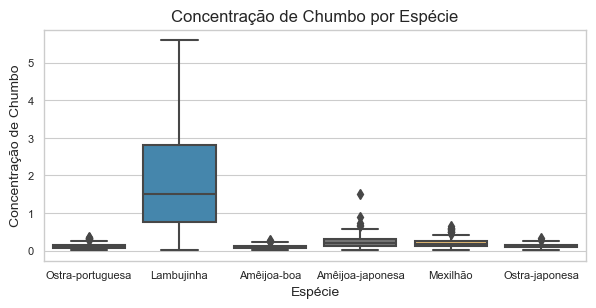

In [70]:
plt.figure(figsize=(7,3))
sns.set_style("whitegrid")
sns.boxplot(x="Espécie",y="Pb (mg/kg)",data=ipma)
plt.title("Concentração de Chumbo por Espécie")

plt.title("Concentração de Chumbo por Espécie",fontsize=12)
plt.ylabel("Concentração de Chumbo",fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel("Espécie",fontsize=10)
plt.xticks(fontsize=8)

plt.show()

Considerando as espécies em estudo e as respetivas amostras dos anos 2013- janeiro de 2023 e o analisar o boxplot verificamos a lambujinha assume destaque como a espécie com uma [Pb] mais elevada , cerca de 1.817566 +/- 1.193698

In [71]:
ipma["Espécie"].value_counts()

Ostra-japonesa      237
Mexilhão            227
Ostra-portuguesa    210
Amêijoa-boa         204
Amêijoa-japonesa    153
Lambujinha          152
Name: Espécie, dtype: int64

__Criar Coluna "Estação", "Mês", "Dia", "Ano"__

> Necessário pois vai ser avaliado a sazonalidade da [Pb] por espécie

In [72]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme


In [73]:
ipma["Dia"]=ipma["Data de colheita"].dt.day

In [74]:
ipma["Mês Nº"]=ipma["Data de colheita"].dt.month

In [75]:
ipma

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11
...,...,...,...,...,...,...,...,...,...
1671,13188,2014-11-05,ESD1,Canal da Vaia,Ostra-portuguesa,0.36,Conforme,5,11
1672,13189,2014-11-05,ESD2,Abul,Ostra-portuguesa,0.34,Conforme,5,11
1673,13166,2014-10-29,EMR,Casa Branca,Ostra-portuguesa,0.28,Conforme,29,10
1675,13140,2014-10-22,ESD2,Abul,Ostra-portuguesa,0.09,Conforme,22,10


In [76]:
def mes(mes):
    if mes==1:
        return "Janeiro"
    elif mes==2:
        return "Fevereiro"
    elif mes==3:
        return "Março"
    elif mes==4:
        return "Abril"
    elif mes==5:
        return "Maio"
    elif mes==6:
        return "Junho"
    elif mes==7:
        return "Julho"
    elif mes==8:
        return "Agosto"
    elif mes==9:
        return "Setembro"
    elif mes==10:
        return "Outobro"
    elif mes==11:
        return "Novembro"
    else:
        return "Dezembro"

In [77]:
ipma["Mês"]=ipma["Mês Nº"].apply(mes)

In [78]:
ipma["Ano"]=ipma["Data de colheita"].dt.year

In [79]:
ipma

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1,Janeiro,2023
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12,Dezembro,2022
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11,Novembro,2022
...,...,...,...,...,...,...,...,...,...,...,...
1671,13188,2014-11-05,ESD1,Canal da Vaia,Ostra-portuguesa,0.36,Conforme,5,11,Novembro,2014
1672,13189,2014-11-05,ESD2,Abul,Ostra-portuguesa,0.34,Conforme,5,11,Novembro,2014
1673,13166,2014-10-29,EMR,Casa Branca,Ostra-portuguesa,0.28,Conforme,29,10,Outobro,2014
1675,13140,2014-10-22,ESD2,Abul,Ostra-portuguesa,0.09,Conforme,22,10,Outobro,2014


In [80]:
## Estação chuvosa até Março
## Estação seca até Setembro

In [81]:
def estação(mes):
    if mes=="Janeiro":
        return "Chuvosa"
    elif mes=="Fevereiro":
        return "Chuvosa"
    elif mes=="Março":
        return "Chuvosa"
    elif mes=="Abril":
        return "Seca"
    elif mes=="Maio":
        return "Seca"
    elif mes=="Junho":
        return "Seca"
    elif mes=="Julho":
        return "Seca"
    elif mes=="Agosto":
        return "Seca"
    elif mes=="Setembro":
        return "Seca"
    elif mes=="Outobro":
        return "Chuvosa"
    elif mes=="Novembro":
        return "Chuvosa"
    elif mes=="Dezembro":
        return "Chuvosa"

In [82]:
ipma["Estação"]=ipma["Mês"].apply(estação)
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1,Janeiro,2023,Chuvosa
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023,Chuvosa
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12,Dezembro,2022,Chuvosa
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022,Chuvosa
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11,Novembro,2022,Chuvosa


In [83]:
ipma_estação=ipma.groupby(["Espécie","Estação"]).agg(Nº_de_Amostra=("Espécie","count"),
                                                  Pb_mean=("Pb (mg/kg)","mean"),
                                                  Pb_std=("Pb (mg/kg)","std"),
                                                  Pb_max=("Pb (mg/kg)","max"),
                                                  Pb_min=("Pb (mg/kg)","min"),
                                                    Pb_median=("Pb (mg/kg)","median"))
ipma_estação

No_de_Amostra   Pb_mean    Pb_std  Pb_max  Pb_min  \
Espécie          Estação                                                      
Amêijoa-boa      Chuvosa            102  0.100588  0.056845    0.27    0.01   
                 Seca               102  0.085196  0.061976    0.24    0.01   
Amêijoa-japonesa Chuvosa             97  0.248041  0.167074    0.88    0.01   
                 Seca                56  0.194821  0.223371    1.50    0.01   
Lambujinha       Chuvosa             86  1.710814  1.222687    5.60    0.01   
                 Seca                66  1.956667  1.149135    4.90    0.44   
Mexilhão         Chuvosa            116  0.200172  0.115261    0.60    0.01   
                 Seca               111  0.181171  0.126697    0.66    0.01   
Ostra-japonesa   Chuvosa            126  0.128968  0.059570    0.34    0.01   
                 Seca               111  0.122973  0.050983    0.23    0.01   
Ostra-portuguesa Chuvosa            105  0.116190  0.075846    0.36    0.01   
                 Seca               105  0.113524  0.057779    0.33    0.01   

                          Pb_median  
Espécie          Estação             
Amêijoa-boa      Chuvosa      0.105  
                 Seca         0.080  
Amêijoa-japonesa Chuvosa      0.210  
                 Seca         0.130  
Lambujinha       Chuvosa      1.450  
                 Seca         1.750  
Mexilhão         Chuvosa      0.180  
                 Seca         0.160  
Ostra-japonesa   Chuvosa      0.130  
                 Seca         0.130  
Ostra-portuguesa Chuvosa      0.110  
                 Seca         0.120

__Comparar Zonas de Produção__

> Zonas de Produção em estudo para temperatura ETJ, ETJ1, ETJ2, ESD1, ESD2, EMR, LOB, RIAV1, RIAV2, RIAV3, RIAV4, ELM, OLH1, OLH2, OLH3, OLH4, OLH5

In [84]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1,Janeiro,2023,Chuvosa
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023,Chuvosa
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12,Dezembro,2022,Chuvosa
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022,Chuvosa
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11,Novembro,2022,Chuvosa


Comparar Zonas de Produção que vão ser estudadas

In [85]:
ipma_analise_z=ipma.groupby(["Zona de Produção","Espécie"]).agg(Nº_de_Amostra=("Espécie","count"),
                                                  Pb_mean=("Pb (mg/kg)","mean"),
                                                  Pb_std=("Pb (mg/kg)","std"),
                                                  Pb_max=("Pb (mg/kg)","max"),
                                                  Pb_min=("Pb (mg/kg)","min"),
                                                    Pb_median=("Pb (mg/kg)","median"))
ipma_analise_z.reset_index(inplace=True)
ipma_analise_z

,Zona de Produção,Espécie,No_de_Amostra,Pb_mean,Pb_std,Pb_max,Pb_min,Pb_median
0,ELM,Amêijoa-boa,6,0.040000,0.043818,0.11,0.01,0.015
1,ELM,Amêijoa-japonesa,1,0.100000,NaN,0.10,0.10,0.100
2,ELM,Mexilhão,7,0.135714,0.037353,0.20,0.09,0.130
3,ELM,Ostra-japonesa,12,0.130000,0.030451,0.18,0.08,0.125
4,ELM,Ostra-portuguesa,7,0.131429,0.042201,0.17,0.06,0.130
...,...,...,...,...,...,...,...,...
144,VT 1,Ostra-japonesa,3,0.170000,0.070000,0.22,0.09,0.200
145,VT1,Ostra-japonesa,1,0.170000,NaN,0.17,0.17,0.170
146,VT1,Ostra-portuguesa,2,0.190000,0.014142,0.20,0.18,0.190
147,ZNV,Amêijoa-boa,4,0.130000,0.018257,0.15,0.11,0.130


In [86]:
ipma["Zona de Produção"].nunique()

70

In [87]:
ipma["Zona de Produção"].value_counts().nlargest(60)

ETJ                         129
EMR                          92
ESD1                         68
LOB                          58
ESD2                         55
OLH4                         34
OLH2                         33
ELM                          33
LAG                          31
RIAV1                        31
OLH5                         31
ESD2 Canal de Alcácer        29
RIAV4                        28
ETJ1                         28
FAR2                         28
RIAV3                        28
FAR1                         26
OLH1                         26
RIAV2                        25
ESD1 Esteiro da Marateca     24
POR2                         22
TAV                          20
FUZ                          19
OLH3                         17
LAL                          17
L4                           15
EMN2                         14
L1                           14
GUA                          11
L7c1                         11
L7a                          11
TAV2    

In [88]:
# Estuário do Sado
estuario_sado=ipma[ (ipma["Zona de Produção"]=="ESD1") | (ipma["Zona de Produção"]=="ESD2") ]
estuario_sado.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022,Chuvosa
41,994/22,2022-09-19,ESD2,Carrasqueira,Amêijoa-japonesa,0.18,Conforme,19,9,Setembro,2022,Seca
75,931/22,2022-09-12,ESD2,Carrasqueira,Amêijoa-boa,0.08,Conforme,12,9,Setembro,2022,Seca
76,932/22,2022-09-12,ESD1,Canal da Vaia,Ostra-portuguesa,0.14,Conforme,12,9,Setembro,2022,Seca
192,253/22,2022-03-29,ESD2,Palma,Lambujinha,0.42,Conforme,29,3,Março,2022,Chuvosa


In [89]:
estuario_sado_analise=estuario_sado.groupby(["Zona de Produção"]).agg(N=("Espécie","count"),
                                                                               Pb_mean=("Pb (mg/kg)","mean"))
estuario_sado_analise

,N,Pb_mean
Zona de Produção,,
ESD1,68,0.320441
ESD2,55,0.436364


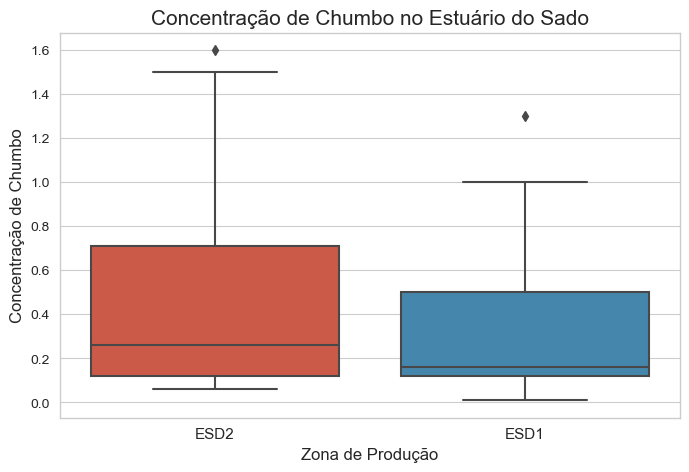

In [90]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)",data=estuario_sado)

plt.title("Concentração de Chumbo no Estuário do Sado",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Zona de Produção",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [91]:
estuario_sado_analise_especie=estuario_sado.groupby(["Zona de Produção","Espécie"]).agg(N=("Espécie","count"),
                                                                               Pb_mean=("Pb (mg/kg)","mean"))
estuario_sado_analise_especie

N   Pb_mean
Zona de Produção Espécie                       
ESD1             Amêijoa-boa        3  0.056667
                 Amêijoa-japonesa   3  0.133333
                 Lambujinha        24  0.663750
                 Ostra-portuguesa  38  0.139211
ESD2             Amêijoa-boa        6  0.093333
                 Amêijoa-japonesa  15  0.166000
                 Lambujinha        25  0.785600
                 Ostra-portuguesa   9  0.145556

Não Parece haver diferenças significativas entre as zonas

In [92]:
# Estuario do Tejo
estuario_tejo=ipma[ (ipma["Zona de Produção"]=="ETJ1") | (ipma["Zona de Produção"]=="ETJ2") | (ipma["Zona de Produção"]=="ETJ") ]
estuario_tejo.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
1,21/23,2023-01-10,ETJ1,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023,Chuvosa
14,1073/22,2022-10-10,ETJ2,Baliza de Ferro,Amêijoa-japonesa,0.01,Conforme,10,10,Outobro,2022,Chuvosa
15,1075/22,2022-10-10,ETJ1,Samouco 2,Ostra-portuguesa,0.01,Conforme,10,10,Outobro,2022,Chuvosa
55,964/22,2022-09-14,ETJ1,Porto Brandão,Mexilhão,0.28,Conforme,14,9,Setembro,2022,Seca
73,929/22,2022-09-12,ETJ1,Samouco,Amêijoa-japonesa,0.20,Conforme,12,9,Setembro,2022,Seca


In [93]:
estuario_tejo_analise=estuario_tejo.groupby(["Zona de Produção"]).agg(N=("Espécie","count"),
                                                                               Pb_mean=("Pb (mg/kg)","mean"))
estuario_tejo_analise

,N,Pb_mean
Zona de Produção,,
ETJ,129,1.457984
ETJ1,28,1.358571
ETJ2,7,0.668571


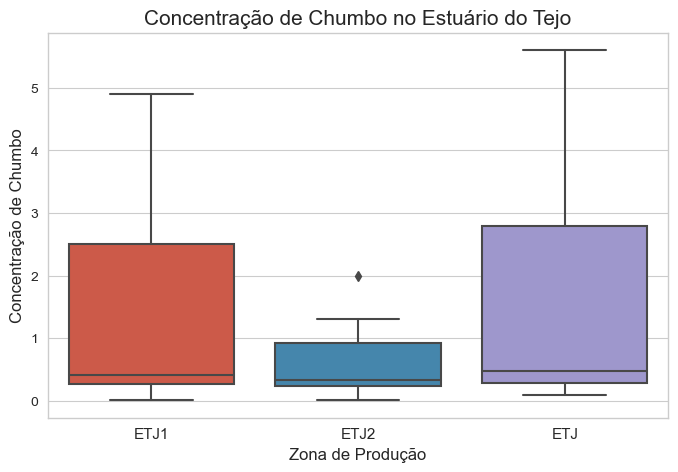

In [94]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)",data=estuario_tejo)

plt.title("Concentração de Chumbo no Estuário do Tejo",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Zona de Produção",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [95]:
estuario_tejo_analise_especie=estuario_tejo.groupby(["Zona de Produção","Espécie"]).agg(N=("Espécie","count"),
                                                                               Pb_mean=("Pb (mg/kg)","mean"))
estuario_tejo_analise_especie

N   Pb_mean
Zona de Produção Espécie                       
ETJ              Amêijoa-japonesa  61  0.327213
                 Lambujinha        56  2.939286
                 Mexilhão          11  0.290909
                 Ostra-portuguesa   1  0.320000
ETJ1             Amêijoa-japonesa   7  0.284286
                 Lambujinha        12  2.825000
                 Mexilhão           5  0.312000
                 Ostra-portuguesa   4  0.147500
ETJ2             Amêijoa-japonesa   4  0.292500
                 Lambujinha         2  1.650000
                 Ostra-japonesa     1  0.210000

Não parecem haver diferenças significativas

In [96]:
# Ria Formosa-Olhão
olh=ipma[ (ipma["Zona de Produção"]=="OLH1") | (ipma["Zona de Produção"]=="OLH2") | (ipma["Zona de Produção"]=="OLH3") | (ipma["Zona de Produção"]=="OLH4") | (ipma["Zona de Produção"]=="OLH5") ]
olh.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
37,1009/22,2022-09-21,OLH2,Fortaleza 1,Mexilhão,0.16,Conforme,21,9,Setembro,2022,Seca
69,951/22,2022-09-13,OLH2,Fortaleza 1,Ostra-japonesa,0.08,Conforme,13,9,Setembro,2022,Seca
70,952/22,2022-09-13,OLH2,Fortaleza 1,Amêijoa-boa,0.07,Conforme,13,9,Setembro,2022,Seca
72,954/22,2022-09-13,OLH4,Garganta,Mexilhão,0.21,Conforme,13,9,Setembro,2022,Seca
77,925/22,2022-09-08,OLH1,Regueira Água Quente 1,Amêijoa-boa,0.11,Conforme,8,9,Setembro,2022,Seca


In [97]:
olh_analise=olh.groupby("Zona de Produção").agg(N=("Espécie","count"),
                                               Pb_mean=("Pb (mg/kg)","mean"))
olh_analise

,N,Pb_mean
Zona de Produção,,
OLH1,26,0.118846
OLH2,33,0.108182
OLH3,17,0.132353
OLH4,34,0.114706
OLH5,31,0.125806


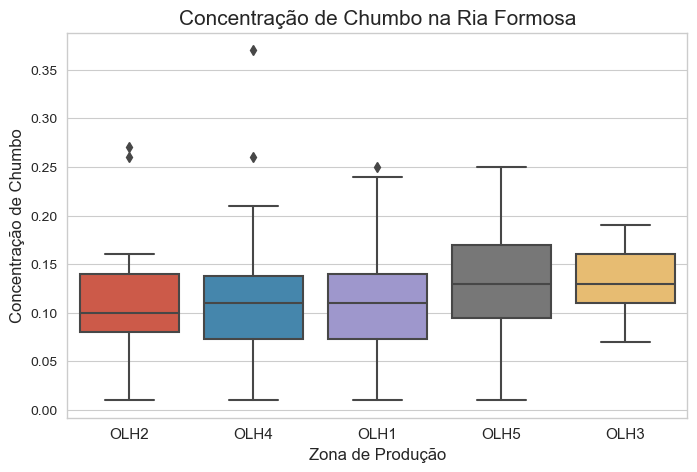

In [98]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)",data=olh)

plt.title("Concentração de Chumbo na Ria Formosa",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Zona de Produção",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [99]:
olh_analise_especie=olh.groupby(["Zona de Produção","Espécie"]).agg(N=("Espécie","count"),
                                               Pb_mean=("Pb (mg/kg)","mean"))
olh_analise_especie

N   Pb_mean
Zona de Produção Espécie                       
OLH1             Amêijoa-boa       14  0.127143
                 Ostra-japonesa    11  0.111818
                 Ostra-portuguesa   1  0.080000
OLH2             Amêijoa-boa       14  0.092143
                 Mexilhão           4  0.155000
                 Ostra-japonesa    12  0.106667
                 Ostra-portuguesa   3  0.126667
OLH3             Amêijoa-boa        8  0.128750
                 Ostra-japonesa     8  0.143750
                 Ostra-portuguesa   1  0.070000
OLH4             Amêijoa-boa       14  0.084286
                 Mexilhão           5  0.212000
                 Ostra-japonesa    14  0.113571
                 Ostra-portuguesa   1  0.070000
OLH5             Amêijoa-boa       15  0.110667
                 Mexilhão           4  0.172500
                 Ostra-japonesa    10  0.125000
                 Ostra-portuguesa   2  0.150000

Não parecem haver diferenças significativas

In [100]:
# Ria de Aveiro
riav=ipma[ (ipma["Zona de Produção"]=="RIAV1") | (ipma["Zona de Produção"]=="RIAV2") | (ipma["Zona de Produção"]=="RIAV3") | (ipma["Zona de Produção"]=="RIAV4") ]
riav.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
8,1165/22,2022-10-27,RIAV4,Sul da Ponte da A25,Amêijoa-boa,0.12,Conforme,27,10,Outobro,2022,Chuvosa
9,1166/22,2022-10-27,RIAV4,Sul da Ponte da A25,Amêijoa-japonesa,0.10,Conforme,27,10,Outobro,2022,Chuvosa
12,1126/22,2022-10-20,RIAV3,Passagem,Amêijoa-boa,0.01,Conforme,20,10,Outobro,2022,Chuvosa
26,1046/22,2022-09-28,RIAV1,Frente Colónia Férias Torreira,Amêijoa-japonesa,0.06,Conforme,28,9,Setembro,2022,Seca
32,1014/22,2022-09-22,RIAV1,Sul Colónia Férias Torreira,Amêijoa-boa,0.18,Conforme,22,9,Setembro,2022,Seca


In [101]:
riav_analise=riav.groupby("Zona de Produção").agg(N=("Espécie","count"),
                                               Pb_mean=("Pb (mg/kg)","mean"))
riav_analise

,N,Pb_mean
Zona de Produção,,
RIAV1,31,0.164194
RIAV2,25,0.160000
RIAV3,28,0.128214
RIAV4,28,0.154286


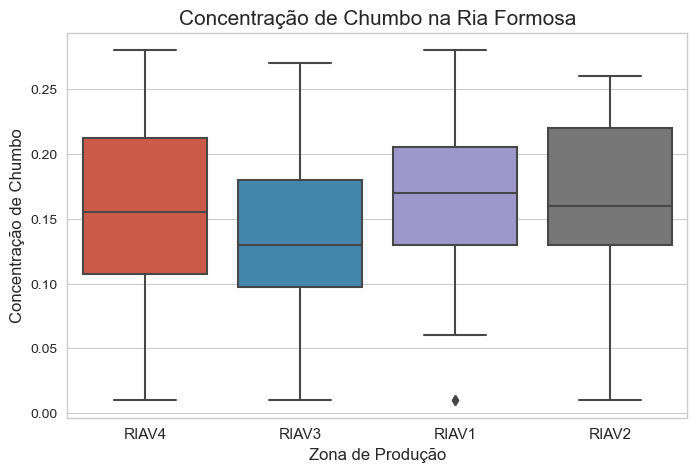

In [102]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)",data=riav)

plt.title("Concentração de Chumbo na Ria Formosa",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Zona de Produção",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [103]:
riav_analise_especie=riav.groupby(["Zona de Produção","Espécie"]).agg(N=("Espécie","count"),
                                               Pb_mean=("Pb (mg/kg)","mean"))
riav_analise_especie

N   Pb_mean
Zona de Produção Espécie                       
RIAV1            Amêijoa-boa        4  0.152500
                 Amêijoa-japonesa  10  0.169000
                 Mexilhão           5  0.194000
                 Ostra-japonesa    12  0.151667
RIAV2            Amêijoa-boa        1  0.010000
                 Amêijoa-japonesa   4  0.175000
                 Mexilhão           5  0.194000
                 Ostra-japonesa    13  0.150000
                 Ostra-portuguesa   2  0.185000
RIAV3            Amêijoa-boa        4  0.012500
                 Amêijoa-japonesa   4  0.117500
                 Mexilhão           5  0.236000
                 Ostra-japonesa    14  0.125714
                 Ostra-portuguesa   1  0.130000
RIAV4            Amêijoa-boa        5  0.140000
                 Amêijoa-japonesa   9  0.150000
                 Mexilhão           2  0.225000
                 Ostra-japonesa    10  0.138000
                 Ostra-portuguesa   2  0.220000

Não parecem haver diferenças significativas

Conclusões:

Visualizando os boxplots das zonas podemos, verificar que em todos os casos a [Pb] parece bastante semelhante, e observando as zonas de produção e as respetivas espécies podemos verificar que a média de [Pb] parece não diferenciar muito. Dado também o facto de ao trabalhar em zonas de produção sepaadas o número de amostras por zona iria ser muito reduzido, decidiu-se juntar as zonas ETJ, ETJ1 e ETJ2 em ETJ, as zonas OLH1, OLH2, OLH3, OLH4 e OLH5 em OLH e as zonas RIAV1, RIAV2, RIAV3 e RIAV4. Ao analisar algumas teses é possível verificar que não existe tal diferenciação

__Padronizar Zonas de Produção__

In [104]:
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD1                          68
ESD2                          55
ESD2 Canal de Alcácer         29
ESD1 Esteiro da Marateca      24
ESD1 - Esteiro da Marateca     1
Estuário do Sado -ESD1         1
Name: Zona de Produção, dtype: int64

In [105]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD2 Canal de Alcácer","ESD2")
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD2                          84
ESD1                          68
ESD1 Esteiro da Marateca      24
ESD1 - Esteiro da Marateca     1
Estuário do Sado -ESD1         1
Name: Zona de Produção, dtype: int64

In [106]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD1 Esteiro da Marateca","ESD1")
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD1                          92
ESD2                          84
ESD1 - Esteiro da Marateca     1
Estuário do Sado -ESD1         1
Name: Zona de Produção, dtype: int64

In [107]:
ipma[ipma["Zona de Produção"].str.contains("ETJ", regex = False, na = False)]["Zona de Produção"].value_counts()

ETJ     129
ETJ1     28
ETJ2      7
Name: Zona de Produção, dtype: int64

In [108]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD1 Esteiro da Marateca","ESD1")
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD1                          92
ESD2                          84
ESD1 - Esteiro da Marateca     1
Estuário do Sado -ESD1         1
Name: Zona de Produção, dtype: int64

In [109]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD1 - Esteiro da Marateca","ESD1")
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD1                      93
ESD2                      84
Estuário do Sado -ESD1     1
Name: Zona de Produção, dtype: int64

In [110]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Sado -ESD1","ESD1")
ipma[ipma["Zona de Produção"].str.contains("ESD", regex = False, na = False)]["Zona de Produção"].value_counts()

ESD1    94
ESD2    84
Name: Zona de Produção, dtype: int64

In [111]:
ipma[ipma["Zona de Produção"].str.contains("EMR", regex = False, na = False)]["Zona de Produção"].value_counts()

EMR                      92
Estuário do Mira -EMR     2
Name: Zona de Produção, dtype: int64

In [112]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Mira -EMR","EMR")

In [113]:
ipma[ipma["Zona de Produção"].str.contains("EMR", regex = False, na = False)]["Zona de Produção"].value_counts()

EMR    94
Name: Zona de Produção, dtype: int64

In [114]:
ipma[ipma["Zona de Produção"].str.contains("LOB",regex=False,na=False)]["Zona de Produção"].value_counts()

LOB    58
Name: Zona de Produção, dtype: int64

In [115]:
ipma[ipma["Zona de Produção"].str.contains("RIAV",regex=False,na=False)]["Zona de Produção"].value_counts()

RIAV1      31
RIAV4      28
RIAV3      28
RIAV2      25
RIAV NZ     3
Name: Zona de Produção, dtype: int64

In [116]:
RIAVNZ=ipma[ipma["Zona de Produção"]=="RIAV NZ"]
ipma.drop(RIAVNZ.index,inplace=True)

In [117]:
ipma[ipma["Zona de Produção"].str.contains("RIAV",regex=False,na=False)]["Zona de Produção"].value_counts()

RIAV1    31
RIAV4    28
RIAV3    28
RIAV2    25
Name: Zona de Produção, dtype: int64

In [118]:
ipma[ipma["Zona de Produção"].str.contains("ELM",regex=False,na=False)]["Zona de Produção"].value_counts()

ELM    33
Name: Zona de Produção, dtype: int64

In [119]:
ipma[ipma["Zona de Produção"].str.contains("OLH",regex=False,na=False)]["Zona de Produção"].value_counts()

OLH4    34
OLH2    33
OLH5    31
OLH1    26
OLH3    17
OLH6     1
Name: Zona de Produção, dtype: int64

In [120]:
ipma[ipma["Zona de Produção"].str.contains("OLH",regex=False,na=False)]["Zona de Produção"].value_counts()

OLH4    34
OLH2    33
OLH5    31
OLH1    26
OLH3    17
OLH6     1
Name: Zona de Produção, dtype: int64

In [121]:
ipma["Zona de Produção"].value_counts()

ETJ                         129
EMR                          94
ESD1                         94
ESD2                         84
LOB                          58
                           ... 
EMN2 - Braço Sul              1
ZT                            1
Estuário do Mondego EMN2      1
SD1 Esteiro da Maratec        1
Estuário do Mira              1
Name: Zona de Produção, Length: 64, dtype: int64

In [122]:
ipma["Zona de Produção"].value_counts()

ETJ                         129
EMR                          94
ESD1                         94
ESD2                         84
LOB                          58
                           ... 
EMN2 - Braço Sul              1
ZT                            1
Estuário do Mondego EMN2      1
SD1 Esteiro da Maratec        1
Estuário do Mira              1
Name: Zona de Produção, Length: 64, dtype: int64

In [123]:
ipma[ipma["Zona de Produção"].str.contains("L1",regex=False,na=False)]["Zona de Produção"].value_counts()

L1    14
Name: Zona de Produção, dtype: int64

In [124]:
ipma[ipma["Zona de Produção"].str.contains("L2",regex=False,na=False)]["Zona de Produção"].value_counts()

L2    8
Name: Zona de Produção, dtype: int64

In [125]:
ipma[ipma["Zona de Produção"].str.contains("L3",regex=False,na=False)]["Zona de Produção"].value_counts()

L3    5
Name: Zona de Produção, dtype: int64

In [126]:
ipma[ipma["Zona de Produção"].str.contains("L4",regex=False,na=False)]["Zona de Produção"].value_counts()

L4    15
Name: Zona de Produção, dtype: int64

In [127]:
ipma[ipma["Zona de Produção"].str.contains("L5",regex=False,na=False)]["Zona de Produção"].value_counts()

L5a    10
L5b    10
L5      9
Name: Zona de Produção, dtype: int64

In [128]:
ipma[ipma["Zona de Produção"].str.contains("L6",regex=False,na=False)]["Zona de Produção"].value_counts()

L6    2
Name: Zona de Produção, dtype: int64

In [129]:
ipma[ipma["Zona de Produção"].str.contains("L7",regex=False,na=False)]["Zona de Produção"].value_counts()

L7a     11
L7c1    11
L7c2     9
L7b      7
L7B      6
L7c      5
L7C      4
L7A      3
Name: Zona de Produção, dtype: int64

In [130]:
ipma[ipma["Zona de Produção"].str.contains("L8",regex=False,na=False)]["Zona de Produção"].value_counts()

L8    8
Name: Zona de Produção, dtype: int64

In [131]:
ipma[ipma["Zona de Produção"].str.contains("L9",regex=False,na=False)]["Zona de Produção"].value_counts()

Series([], Name: Zona de Produção, dtype: int64)

In [132]:
ipma[ipma["Zona de Produção"].str.contains("POR",regex=False,na=False)]["Zona de Produção"].value_counts()

POR2     22
POR3      9
POR 2     1
Name: Zona de Produção, dtype: int64

In [133]:
ipma[ipma["Zona de Produção"].str.contains("VT",regex=False,na=False)]["Zona de Produção"].value_counts()

VT      8
VT 1    3
VT1     3
Name: Zona de Produção, dtype: int64

In [134]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ETJ1","ETJ")

In [135]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ETJ2","ETJ")

In [136]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD1","ESD")

In [137]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("ESD2","ESD")

In [138]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH1","OLH")

In [139]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH2","OLH")

In [140]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH3","OLH")

In [141]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH4","OLH")

In [142]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH5","OLH")

In [143]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("RIAV1","RIAV")

In [144]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("RIAV2","RIAV")

In [145]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("RIAV3","RIAV")

In [146]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("RIAV4","RIAV")

In [147]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN2","EMN")

In [148]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN2 - Braço Sul","EMN")

In [149]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN2 Braço Sul","EMN")

In [150]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN Braço Sul","EMN")

In [151]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN ZN","EMN")

In [152]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("EMN - Braço Sul","EMN")

In [153]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Mondego EMN","EMN")

In [154]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("FAR1","FAR")

In [155]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("FAR2","FAR")

In [156]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("FAR 2","FAR2")

In [157]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("FUZ1","FUZ")

In [158]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("TAV2","TAV")

In [159]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("LAG1","LAG")

In [160]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Sado","ESD")

In [161]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("SD1 Esteiro da Maratec","ESD1")

In [162]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Mira","EMR")

In [163]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("Estuário do Mira","EMR")

In [164]:
ipma[ipma["Zona de Produção"].str.contains("L7",regex=False,na=False)]["Zona de Produção"].value_counts()

L7a     11
L7c1    11
L7c2     9
L7b      7
L7B      6
L7c      5
L7C      4
L7A      3
Name: Zona de Produção, dtype: int64

In [165]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("L7A","L7a")

In [166]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("L7C","L7c1")

In [167]:
c=ipma[ipma["Zona de Produção"]=="L7c"]
c

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
1364,16517,2017-03-14,L7c,Porto de Mós,Mexilhão,0.24,Conforme,14,3,Março,2017,Chuvosa
1483,15161,2016-03-15,L7c,Porto de Mós,Mexilhão,0.15,Conforme,15,3,Março,2016,Chuvosa
1491,15142,2016-03-09,L7c,Offshore,Mexilhão,0.13,Conforme,9,3,Março,2016,Chuvosa
1567,14280,2015-09-08,L7c,Porto de Mós,Mexilhão,0.11,Conforme,8,9,Setembro,2015,Seca
1653,13523,2015-03-03,L7c,Porto de Mós,Mexilhão,0.26,Conforme,3,3,Março,2015,Chuvosa


In [168]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].drop(c.index)

In [169]:
ipma[ipma["Zona de Produção"].str.contains("L7",regex=False,na=False)]["Zona de Produção"].value_counts()

L7c1    15
L7a     14
L7c2     9
L7b      7
L7B      6
Name: Zona de Produção, dtype: int64

In [170]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("L7B","L7b")

In [171]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("POR 2","POR2")

In [172]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("VT 1","VT")

In [173]:
ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("VT1","VT")

In [174]:
#ipma["Zona de Produção"]=ipma["Zona de Produção"].str.replace("OLH6","OLH")

In [175]:
ipma["Zona de Produção"].value_counts()

ETJ      164
EMR       95
ESD1      95
ESD2      84
LOB       58
OLH4      34
ELM       33
LAG       33
OLH2      33
OLH5      31
RIAV1     31
TAV       31
FAR2      30
RIAV4     28
FUZ       28
RIAV3     28
OLH1      26
FAR1      26
EMN       26
RIAV2     25
POR2      23
OLH3      17
LAL       17
L4        15
L7c1      15
L7a       14
VT        14
L1        14
L7b       13
GUA       11
L5b       10
L5a       10
POR3       9
L7c2       9
L5         9
L8         8
L2         8
L3         5
ZNV        4
L6         2
ESD        2
Fuz        1
ZT         1
OLH6       1
Name: Zona de Produção, dtype: int64

In [176]:
ipma[ipma["Zona de Produção"]=="ETJ"]["Local"].value_counts()

Samouco                    64
Ponta dos Corvos           19
Baliza de Ferro            18
Porto Brandão              15
Rosário                     6
Cais do Seixalinho          5
Barreiro                    4
Ponta do Mouchão            3
Mar dos Velhos              3
Ladeiro                     3
Ilha do Rato                3
Base Aérea                  3
Alcochete jusante           3
Sacavém                     3
Sul Ponte Vasco da Gama     3
Samouco 2                   2
Barreiro 2                  1
Rosário/Moita               1
Vagem da Cana Verde         1
Barreiro/Copacabana         1
Jusante da PVG              1
Alcochete                   1
Base Aérea 1                1
Name: Local, dtype: int64

In [177]:
ipma[ipma["Zona de Produção"]=="ETJ1"]["Local"].value_counts()

Series([], Name: Local, dtype: int64)

In [178]:
ipma[ipma["Zona de Produção"]=="ETJ2"]["Local"].value_counts()

Series([], Name: Local, dtype: int64)

In [179]:
ipma_z_analise=ipma.groupby(["Zona de Produção","Espécie"]).agg(Nº_de_Amostra=("Espécie","count"),
                                                  Pb_mean=("Pb (mg/kg)","mean"),
                                                  Pb_std=("Pb (mg/kg)","std"),
                                                  Pb_max=("Pb (mg/kg)","max"),
                                                  Pb_min=("Pb (mg/kg)","min"),
                                                    Pb_median=("Pb (mg/kg)","median"))
ipma_z_analise

No_de_Amostra   Pb_mean    Pb_std  Pb_max  \
Zona de Produção Espécie                                                       
ELM              Amêijoa-boa                   6  0.040000  0.043818    0.11   
                 Amêijoa-japonesa              1  0.100000       NaN    0.10   
                 Mexilhão                      7  0.135714  0.037353    0.20   
                 Ostra-japonesa               12  0.130000  0.030451    0.18   
                 Ostra-portuguesa              7  0.131429  0.042201    0.17   
...                                          ...       ...       ...     ...   
TAV              Ostra-portuguesa              1  0.200000       NaN    0.20   
VT               Ostra-japonesa               12  0.150833  0.050174    0.22   
                 Ostra-portuguesa              2  0.190000  0.014142    0.20   
ZNV              Amêijoa-boa                   4  0.130000  0.018257    0.15   
ZT               Amêijoa-boa                   1  0.060000       NaN    0.06   

                                   Pb_min  Pb_median  
Zona de Produção Espécie                              
ELM              Amêijoa-boa         0.01      0.015  
                 Amêijoa-japonesa    0.10      0.100  
                 Mexilhão            0.09      0.130  
                 Ostra-japonesa      0.08      0.125  
                 Ostra-portuguesa    0.06      0.130  
...                                   ...        ...  
TAV              Ostra-portuguesa    0.20      0.200  
VT               Ostra-japonesa      0.07      0.165  
                 Ostra-portuguesa    0.18      0.190  
ZNV              Amêijoa-boa         0.11      0.130  
ZT               Amêijoa-boa         0.06      0.060  

[113 rows x 6 columns]

__Sazonalidade__

In [180]:
ipma_analise=ipma.groupby(["Espécie","Estação"]).agg(Nº_de_Amostra=("Espécie","count"),
                                                  Pb_mean=("Pb (mg/kg)","mean"),
                                                  Pb_std=("Pb (mg/kg)","std"),
                                                  Pb_max=("Pb (mg/kg)","max"),
                                                  Pb_min=("Pb (mg/kg)","min"),
                                                    Pb_median=("Pb (mg/kg)","median"))
ipma_analise

No_de_Amostra   Pb_mean    Pb_std  Pb_max  Pb_min  \
Espécie          Estação                                                      
Amêijoa-boa      Chuvosa            102  0.100588  0.056845    0.27    0.01   
                 Seca               102  0.085196  0.061976    0.24    0.01   
Amêijoa-japonesa Chuvosa             97  0.248041  0.167074    0.88    0.01   
                 Seca                56  0.194821  0.223371    1.50    0.01   
Lambujinha       Chuvosa             86  1.710814  1.222687    5.60    0.01   
                 Seca                66  1.956667  1.149135    4.90    0.44   
Mexilhão         Chuvosa            116  0.200172  0.115261    0.60    0.01   
                 Seca               111  0.181171  0.126697    0.66    0.01   
Ostra-japonesa   Chuvosa            126  0.128968  0.059570    0.34    0.01   
                 Seca               108  0.124167  0.050384    0.23    0.01   
Ostra-portuguesa Chuvosa            105  0.116190  0.075846    0.36    0.01   
                 Seca               105  0.113524  0.057779    0.33    0.01   

                          Pb_median  
Espécie          Estação             
Amêijoa-boa      Chuvosa      0.105  
                 Seca         0.080  
Amêijoa-japonesa Chuvosa      0.210  
                 Seca         0.130  
Lambujinha       Chuvosa      1.450  
                 Seca         1.750  
Mexilhão         Chuvosa      0.180  
                 Seca         0.160  
Ostra-japonesa   Chuvosa      0.130  
                 Seca         0.130  
Ostra-portuguesa Chuvosa      0.110  
                 Seca         0.120

## Análise de Inconformidades

__Nº de Inconformidades por Espécie em Estudo__

In [181]:
ipma_zonas_conf=ipma.groupby(["Espécie","Observações"]).agg(N=("Observações","count"))
ipma_zonas_conf.sort_values(by="N",ascending=False)

N
Espécie          Observações      
Ostra-japonesa   Conforme      234
Mexilhão         Conforme      227
Ostra-portuguesa Conforme      210
Amêijoa-boa      Conforme      204
Amêijoa-japonesa Conforme      152
Lambujinha       Não Conforme   78
                 Conforme       74
Amêijoa-japonesa Não Conforme    1

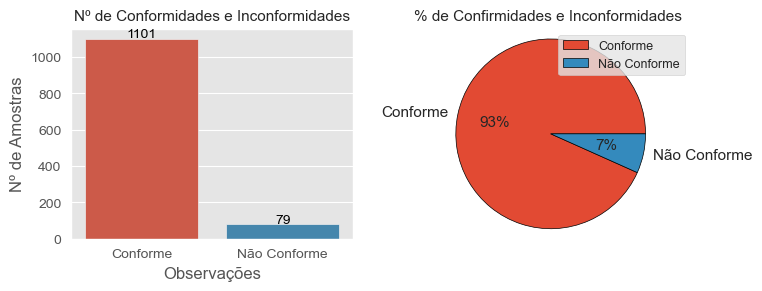

In [182]:
plt.style.use("ggplot")
fig=plt.figure(figsize=(8,6))

fig.add_subplot(2,2,1)
plot=sns.countplot(x="Observações",data=ipma)
plt.title("Nº de Conformidades e Inconformidades", fontsize=11)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=10,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.ylabel("Nº de Amostras")

fig.add_subplot(2,2,2)
plt.pie(ipma["Observações"].value_counts().values, 
        labels = list(ipma["Observações"].value_counts().index), 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11},
        autopct='%1.0f%%',
        explode=[0.0,0.0,]
        )
plt.axis("equal")
plt.title("% de Confirmidades e Inconformidades ",fontsize=11)
plt.legend(loc="best",fontsize=9)
plt.show()

In [183]:
n_conf=ipma[ipma["Observações"] == "Não Conforme"]
n_conf.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
259,30/22,2022-01-18,ETJ,Samouco,Lambujinha,2.0,Não Conforme,18,1,Janeiro,2022,Chuvosa
307,953/21,2021-10-19,ETJ,Samouco,Lambujinha,1.5,Não Conforme,19,10,Outobro,2021,Chuvosa
354,819/21,2021-09-20,ETJ,Samouco,Lambujinha,3.3,Não Conforme,20,9,Setembro,2021,Seca
402,707/21,2021-08-11,ETJ,Samouco,Lambujinha,3.6,Não Conforme,11,8,Agosto,2021,Seca
421,557/21,2021-06-23,ETJ,Samouco,Lambujinha,3.3,Não Conforme,23,6,Junho,2021,Seca


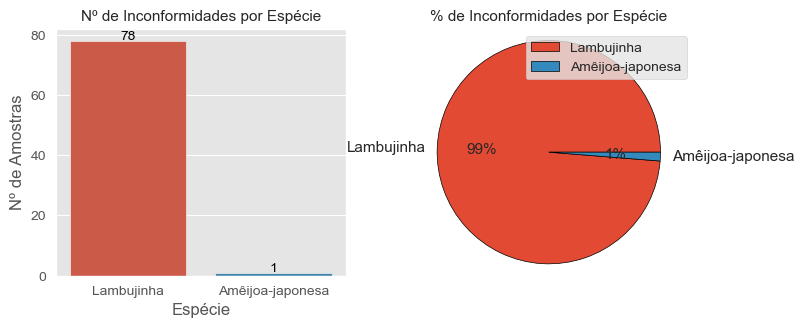

In [184]:
plt.style.use("ggplot")
fig=plt.figure(figsize=(8,6))

fig.add_subplot(2,2,1)
plot=sns.countplot(x="Espécie",data=n_conf)
plt.title("Nº de Inconformidades por Espécie", fontsize=11)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=10,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.ylabel("Nº de Amostras")

fig.add_subplot(2,2,2)
plt.pie(n_conf["Espécie"].value_counts().values, 
        labels = list(n_conf["Espécie"].value_counts().index), 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11},
        autopct='%1.0f%%',
        explode=[0.0,0.0,]
        )
plt.axis("equal")
plt.title("% de Inconformidades por Espécie",fontsize=11)
plt.legend(loc="best",fontsize=10)

plt.tight_layout()
plt.show()

De acordo com a figura podemos verificar que a espécie com maior nº de inconformidade foi a lambujinha com 78 casos, o que representa cerca de 99% das inconformidades detetadas entre 2013 e 2023

__Nº de Inconformidades por Zona de Produção__

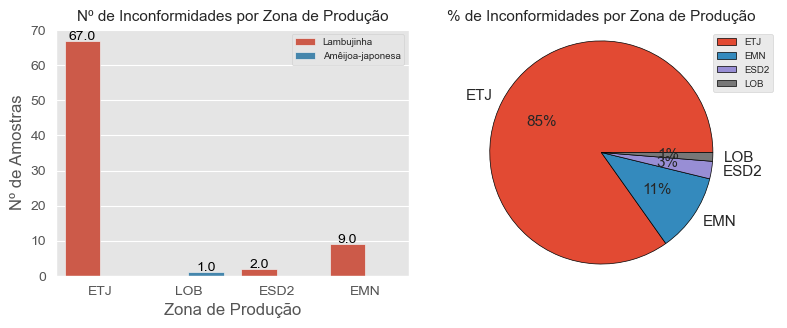

In [185]:
plt.style.use("ggplot")
fig=plt.figure(figsize=(8,6))

fig.add_subplot(2,2,1)
plot=sns.countplot(x="Zona de Produção",hue="Espécie",data=n_conf)
plt.title("Nº de Inconformidades por Zona de Produção", fontsize=11)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=10,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.legend(loc="best",fontsize=7)
plt.ylabel("Nº de Amostras")

fig.add_subplot(2,2,2)
plt.pie(n_conf["Zona de Produção"].value_counts().values, 
        labels = list(n_conf["Zona de Produção"].value_counts().index), 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11},
        autopct='%1.0f%%'
        )
plt.axis("equal")
plt.title("% de Inconformidades por Zona de Produção",fontsize=11)
plt.legend(loc="upper right",fontsize=7)
plt.tight_layout()
plt.show()

De acordo com a figura podemos verificar que a zona de produção com maior nº de inconformidade foi o estuário do tejo com 67 casos de inconformidades em lambujinha, o que representa cerca de 85% das inconformidades detetadas entre 2013 e 2023

__Nº de Inconformidades por Estação do Ano__

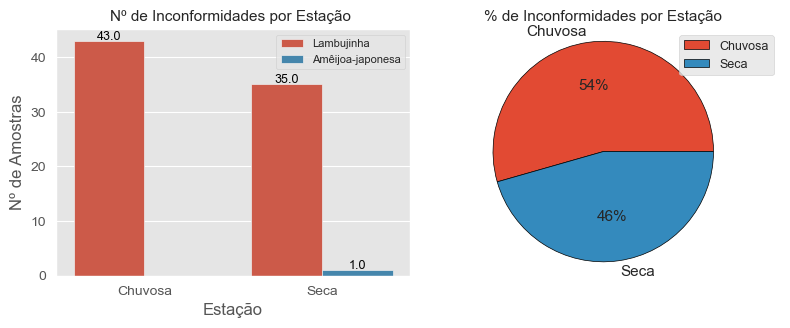

In [186]:
plt.style.use("ggplot")
fig=plt.figure(figsize=(8,6))

fig.add_subplot(2,2,1)
plot=sns.countplot(x="Estação",hue="Espécie",data=n_conf)
plt.title("Nº de Inconformidades por Estação ", fontsize=11)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                 ha="center",va="baseline",fontsize=9,
                 color="black",xytext=(0,1),
                 textcoords="offset points")
plt.legend(loc="best",fontsize=8)
plt.ylabel("Nº de Amostras")


fig.add_subplot(2,2,2)
plt.pie(n_conf["Estação"].value_counts().values, 
        labels = list(n_conf["Estação"].value_counts().index), 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11},
        autopct='%1.0f%%'
        )
plt.axis("equal")
plt.title("% de Inconformidades por Estação",fontsize=11)
plt.legend(loc="best",fontsize=9)

plt.tight_layout()
plt.show()
plt.show()

De acordo com a figura podemos verificar que a estação do ano com maior nº de inconformidade foi a estação chuvosa com 43 casos, o que representa cerca de 54% das inconformidades detetadas entre 2013 e 2023

## Análise da Variação de [Pb] por Espécie

In [187]:
ipma_esp

,Na_de_Amostras,Pb_mean,Pb_std,Pb_max,Pb_min,Pb_median
Espécie,,,,,,
Lambujinha,152,1.817566,1.193698,5.60,0.01,1.50
Amêijoa-japonesa,153,0.228562,0.190644,1.50,0.01,0.19
Mexilhão,227,0.190881,0.121094,0.66,0.01,0.17
Ostra-japonesa,237,0.126160,0.055678,0.34,0.01,0.13
Ostra-portuguesa,210,0.114857,0.067272,0.36,0.01,0.11
Amêijoa-boa,204,0.092892,0.059819,0.27,0.01,0.09


## Amêijoa-boa

In [188]:
aj_boa=ipma[ipma["Espécie"]=="Amêijoa-boa"]
aj_boa.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
8,1165/22,2022-10-27,RIAV4,Sul da Ponte da A25,Amêijoa-boa,0.12,Conforme,27,10,Outobro,2022,Chuvosa
12,1126/22,2022-10-20,RIAV3,Passagem,Amêijoa-boa,0.01,Conforme,20,10,Outobro,2022,Chuvosa
32,1014/22,2022-09-22,RIAV1,Sul Colónia Férias Torreira,Amêijoa-boa,0.18,Conforme,22,9,Setembro,2022,Seca
43,996/22,2022-09-19,L6,Ilhéu de Troia,Amêijoa-boa,0.21,Conforme,19,9,Setembro,2022,Seca
57,966/22,2022-09-14,FUZ,Fuzeta 1,Amêijoa-boa,0.09,Conforme,14,9,Setembro,2022,Seca


In [189]:
skim(aj_boa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 204    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean      ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)        │    0 │       0 │     0.093 │    0.06 │    0.01 │    0.06 │    0.13 │   0.27 │  ▇█▇▅▁▁  │  │
│ │ Dia               │    0 │       0 │        13 │     8.1 │       1 │       6 │      19 │     31 │  ▆▆█▃▃▂  │  │
│ │ Mês Nº            │    0 │       0 │       6.2 │       3 │       1 │       3 │       9 │     12 │   █▂ █▁  │  │
│ │ Ano               │    0 │       0 │      2000 │     2.3 │    2000 │    2000 │    2000 │   2000 │  ▄▂▂▂▄█  │  │
│ └───────────────────┴──────┴─────────┴───────────┴─────────┴─────────┴─────────┴─────────┴────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2015-03-02     │    2022-10-27     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   200 │  │
│ │ Zona de Produção                 │      0 │         0 │                          1 │                   200 │  │
│ │ Local                            │      0 │         0 │                          1 │                   200 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   200 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   200 │  │
│ │ Mês                              │      0 │         

__Monitorização ao longo dos anos__

In [190]:
aj_boa_amostras=aj_boa.groupby(pd.Grouper(key="Data de colheita", freq="Y")).agg(N=("Data de colheita", "count"))
aj_boa_amostras

,N
Data de colheita,
2015-12-31,24
2016-12-31,11
2017-12-31,22
2018-12-31,22
2019-12-31,22
2020-12-31,32
2021-12-31,35
2022-12-31,36


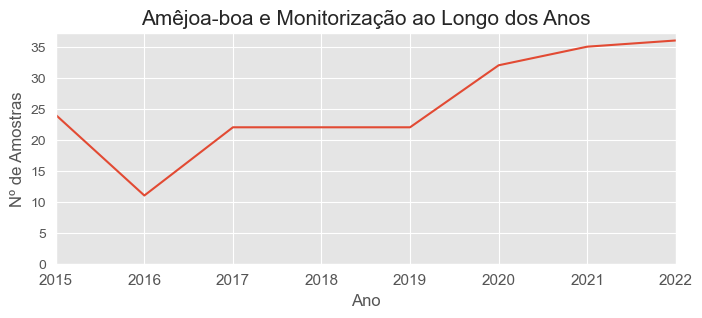

In [191]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
aj_boa_amostras["N"].plot()
plt.title("Amêjoa-boa e Monitorização ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(range(0,40,5),fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

É possível verificar que entre 2015 e 2016, ocorreu uma diminuição na recolha de amostras, tendo se verificado no ano seguinte um aumento até 2017, uma recolha de amostras constante ao longo dos anos 2017-2018-2019, tendo depois verificado um crescimento até aos dias de hoje.

Deste modo é possível concluir que nos últimos 4 anos, a monitorização de amêijoa-boa tem vindo a crescer

__[Pb] ao Longo dos Anos__

> Séries Temporais

In [192]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [193]:
# Criar Série Tmporal
aj_boa_st=aj_boa.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita", "count"),
                                                                         Pb_mean=("Pb (mg/kg)","mean"),
                                                                         Pb_std=("Pb (mg/kg)","std"),
                                                                        Pb_max=("Pb (mg/kg)","max"))

aj_boa_st

,N,Pb_mean,Pb_std,Pb_max
Data de colheita,,,,
2015-12-31,24,0.086250,0.045760,0.16
2016-12-31,11,0.097273,0.049008,0.15
2017-12-31,22,0.143636,0.062377,0.27
2018-12-31,22,0.115455,0.058124,0.20
2019-12-31,22,0.083182,0.042019,0.17
2020-12-31,32,0.063750,0.057403,0.22
2021-12-31,35,0.080857,0.061231,0.20
2022-12-31,36,0.094722,0.061248,0.24


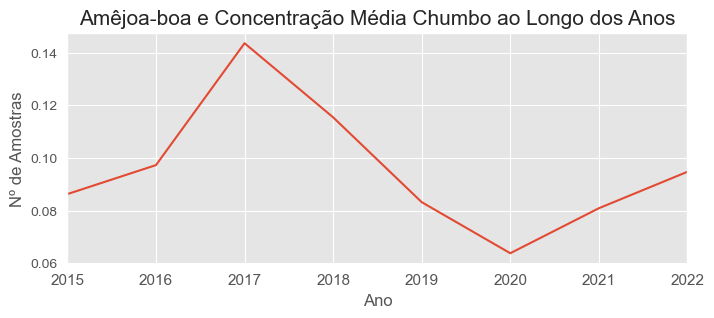

In [194]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
aj_boa_st["Pb_mean"].plot()

plt.title("Amêjoa-boa e Concentração Média Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Amêijoa-boa e Concentração de Chumbo ao Longo dos Anos')

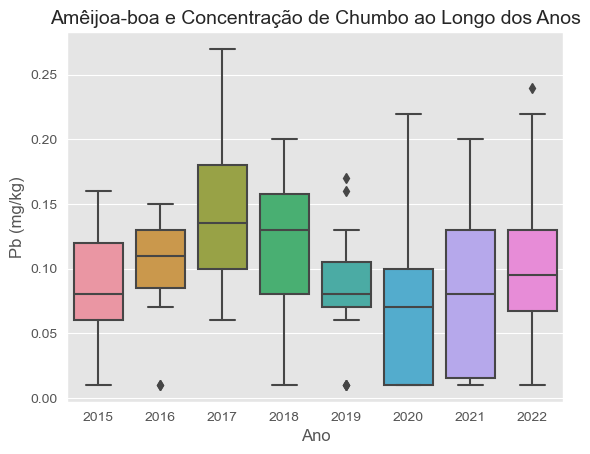

In [195]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=aj_boa)
plt.title("Amêijoa-boa e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

Aumento de [Pb] no ano de 2015-2016, redução entre 2017-2020 e aumento entre 2020-2022.

Deste modo, é possível concluir que a [Pb] na amêjoa-boa tem vindo a aumnetar nos últimos 3 anos

__Sazonalidade da Concentração de Chumbo__

In [196]:
aj_boa_est=aj_boa.groupby("Estação").agg(N=("Espécie","count"),
                                        Pb_mean=("Pb (mg/kg)","mean"),
                                        Pb_std=("Pb (mg/kg)","std"),
                                        Pb_max=("Pb (mg/kg)","max"),
                                        Pb_median=("Pb (mg/kg)","median"))
aj_boa_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,102,0.100588,0.056845,0.27,0.105
Seca,102,0.085196,0.061976,0.24,0.080


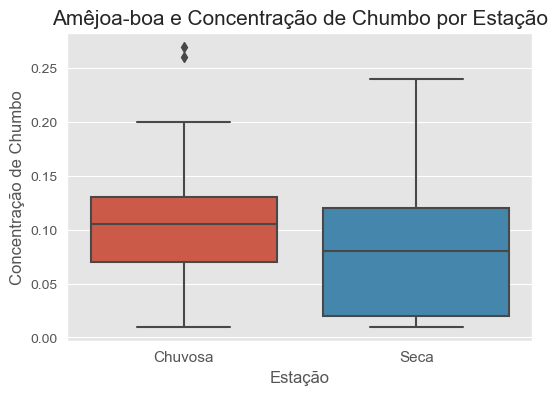

In [197]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=aj_boa)

plt.title("Amêjoa-boa e Concentração de Chumbo por Estação",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [198]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Variação da Concentração de Chumbo por Zona de Produção__

In [199]:
aj_boa_zona=aj_boa.groupby("Zona de Produção").agg(N=("Espécie","count"),
                                        Pb_mean=("Pb (mg/kg)","mean"),
                                        Pb_std=("Pb (mg/kg)","std"),
                                        Pb_max=("Pb (mg/kg)","max"),
                                        Pb_median=("Pb (mg/kg)","median"))
aj_boa_zona.sort_values(by="N",ascending=False)

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Zona de Produção,,,,,
LOB,17,0.065882,0.054090,0.18,0.070
FUZ,15,0.105333,0.040685,0.17,0.100
OLH5,15,0.110667,0.052026,0.18,0.130
LAG,15,0.032667,0.032396,0.09,0.010
OLH2,14,0.092143,0.062163,0.26,0.080
TAV,14,0.142143,0.065184,0.27,0.145
OLH4,14,0.084286,0.049102,0.15,0.080
OLH1,14,0.127143,0.056762,0.24,0.115
FAR1,13,0.107692,0.053565,0.19,0.110


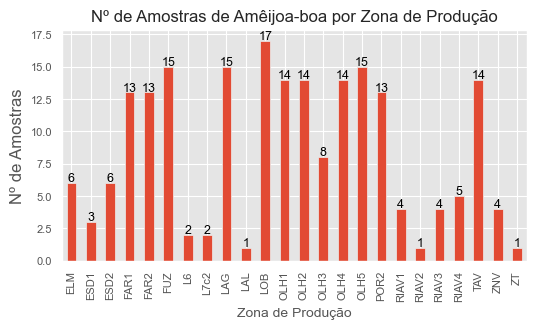

In [200]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=aj_boa_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Amêijoa-boa por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

Analisando a figura acima podemos verificar que a zona de produção OLH destaca-se na monitorização de amêijo-boa com um número de amostras de 65, seguindo-se a zona FAR com 26, LOB com 17 e LAG e FUZ com 15. Por este mesmo motivo e com o objetivo de estudar se de facto a concentração de chumbo de amêijo-boa varia consoante com a zona de produção, serão estudas as zonas referidas anteriormente.

In [201]:
#aj_boa_zonas_est= aj_boa[ (aj_boa["Zona de Produção"]=="OLH") | (aj_boa["Zona de Produção"]=="LOB") | (aj_boa["Zona de Produção"]=="FAR") | (aj_boa["Zona de Produção"]=="LAG") | (aj_boa["Zona de Produção"]=="FUZ") ]

In [202]:
#sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)", data=aj_boa_zonas_est)

Yes, you can apply the Mann-Whitney U test to compare the two groups, even if they have different sample sizes. The Mann-Whitney U test is a nonparametric test that does not depend on the assumption of normality or equal variances. Instead, it uses the ranks of the observations to compare the two groups.

However, keep in mind that having a large sample size in one group and a small sample size in the other group can affect the power of the test to detect a significant difference between the groups. If the sample size of one group is much larger than the other, the test may have less power to detect a difference in the smaller group.

Therefore, you may want to consider whether the sample sizes are adequate to detect the effect size you are interested in. If the effect size is small, you may need a larger sample size to detect it with sufficient power.

If you have a situation where one group has a much larger sample size than the other group, and you are concerned about the power of the Mann-Whitney U test to detect a significant difference between the groups, there are several approaches you can take:

Resample the larger group: You can randomly select a subset of observations from the larger group to match the size of the smaller group. This will balance the sample sizes between the two groups and improve the power of the test.

Use an alternative test: If you are concerned about the power of the Mann-Whitney U test, you can consider using an alternative test that is more robust to differences in sample sizes. For example, you can use the Wilcoxon rank-sum test, which is similar to the Mann-Whitney U test but uses a slightly different formula to calculate the test statistic.

Pool the variance estimate: If the variances of the two groups are similar, you can pool the variance estimate to improve the accuracy of the test. This involves calculating a weighted average of the variance estimates from the two groups.

Conduct a power analysis: You can conduct a power analysis to determine the sample size needed to detect a difference of a given effect size with a desired level of power. This will help you determine whether your current sample sizes are adequate or whether you need to collect more data.

It is important to consider the appropriate approach for your specific research question and data. Consulting with a statistician or data analyst can also be helpful in making these decisions.

In [203]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

Tal como referido anteriormente, no que concerne à Amêijo-boa destaca-se a zona de produção OLH, pelo que neste tópico será analisa a referida zona de produção

## Amêijoa-japonesa

In [204]:
aj_japon=ipma[ipma["Espécie"]=="Amêijoa-japonesa"]
aj_japon.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
9,1166/22,2022-10-27,RIAV4,Sul da Ponte da A25,Amêijoa-japonesa,0.10,Conforme,27,10,Outobro,2022,Chuvosa
14,1073/22,2022-10-10,ETJ,Baliza de Ferro,Amêijoa-japonesa,0.01,Conforme,10,10,Outobro,2022,Chuvosa
26,1046/22,2022-09-28,RIAV1,Frente Colónia Férias Torreira,Amêijoa-japonesa,0.06,Conforme,28,9,Setembro,2022,Seca
41,994/22,2022-09-19,ESD2,Carrasqueira,Amêijoa-japonesa,0.18,Conforme,19,9,Setembro,2022,Seca
64,945/22,2022-09-13,LOB,Greijau,Amêijoa-japonesa,0.01,Conforme,13,9,Setembro,2022,Seca


In [205]:
skim(aj_boa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 204    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean      ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)        │    0 │       0 │     0.093 │    0.06 │    0.01 │    0.06 │    0.13 │   0.27 │  ▇█▇▅▁▁  │  │
│ │ Dia               │    0 │       0 │        13 │     8.1 │       1 │       6 │      19 │     31 │  ▆▆█▃▃▂  │  │
│ │ Mês Nº            │    0 │       0 │       6.2 │       3 │       1 │       3 │       9 │     12 │   █▂ █▁  │  │
│ │ Ano               │    0 │       0 │      2000 │     2.3 │    2000 │    2000 │    2000 │   2000 │  ▄▂▂▂▄█  │  │
│ └───────────────────┴──────┴─────────┴───────────┴─────────┴─────────┴─────────┴─────────┴────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2015-03-02     │    2022-10-27     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   200 │  │
│ │ Zona de Produção                 │      0 │         0 │                          1 │                   200 │  │
│ │ Local                            │      0 │         0 │                          1 │                   200 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   200 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   200 │  │
│ │ Mês                              │      0 │         

__Monitorização ao Longo dos Anos__

In [206]:
aj_japon_amostras=aj_boa.groupby(pd.Grouper(key="Data de colheita", freq="Y")).agg(N=("Data de colheita", "count"))
aj_japon_amostras

,N
Data de colheita,
2015-12-31,24
2016-12-31,11
2017-12-31,22
2018-12-31,22
2019-12-31,22
2020-12-31,32
2021-12-31,35
2022-12-31,36


In [207]:
aj_japon_st=aj_japon.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita","count"),
                                                                                    Pb_mean=("Pb (mg/kg)","mean"),
                                                                                    Pb_std=("Pb (mg/kg)","std"),
                                                                                    Pb_max=("Pb (mg/kg)","max"),
                                                                                    Pb_median=("Pb (mg/kg)","median"))
aj_japon_st

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Data de colheita,,,,,
2015-12-31,8,0.198750,0.131631,0.45,0.160
2016-12-31,7,0.232857,0.158400,0.53,0.130
2017-12-31,10,0.230000,0.148099,0.50,0.210
2018-12-31,10,0.225000,0.109468,0.46,0.200
2019-12-31,42,0.327381,0.264732,1.50,0.265
2020-12-31,39,0.227949,0.129049,0.51,0.200
2021-12-31,20,0.137000,0.125199,0.54,0.115
2022-12-31,17,0.107059,0.138553,0.52,0.060


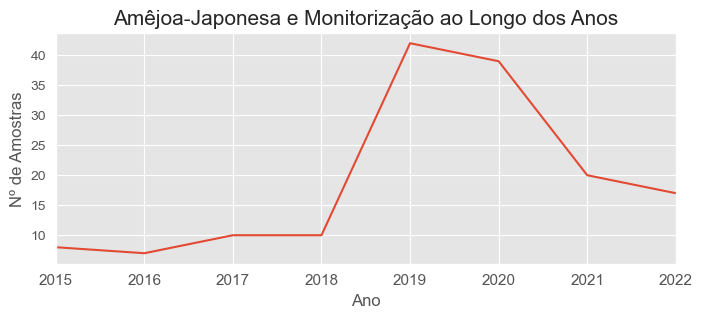

In [208]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
aj_japon_st["N"].plot()

plt.title("Amêjoa-Japonesa e Monitorização ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

É possível verificar que entre 2015 e 2018, foi efetuada uma recolha de amostras constante ao longo dos anos, tendo depois verificado um crescimento em 2019 e um decrescimo até 2022.

Deste modo é possível concluir que nos últimos 4 anos, a monitorização de amêijoa-boa tem vindo a diminuir

__[Pb] ao Longo dos Anos__

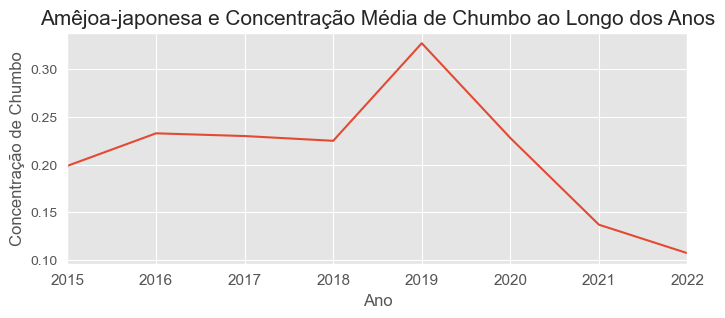

In [209]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
aj_japon_st["Pb_mean"].plot()

plt.title("Amêjoa-japonesa e Concentração Média de Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Amêijoa-Japonesa e Concentração de Chumbo ao Longo dos Anos')

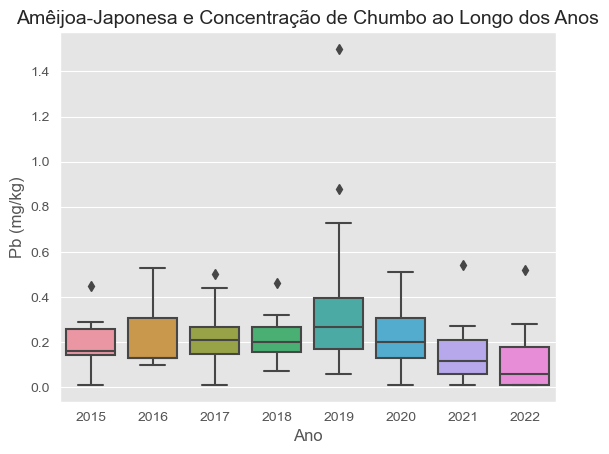

In [210]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=aj_japon)
plt.title("Amêijoa-Japonesa e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

[Pb] +/- constante entre 2015-2018, aumento em 2019, redução entre 2020-2022.

Deste modo, é possível concluir que a [Pb] na amêjoa-boa tem vindo a diminuir nos últimos 3 anos

__Sazonalidade da Concentração de Chumbo__

In [211]:
aj_japon_est=aj_japon.groupby("Estação").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
aj_japon_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,97,0.248041,0.167074,0.88,0.21
Seca,56,0.194821,0.223371,1.50,0.13


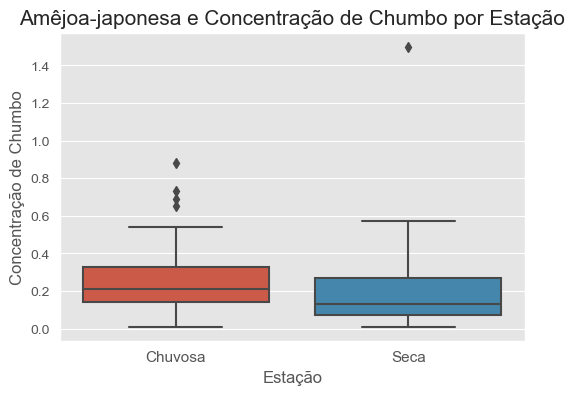

In [212]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=aj_japon)

plt.title("Amêjoa-japonesa e Concentração de Chumbo por Estação",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [213]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Variação da Concentração de Chumbo por Zona de Produção__

In [214]:
aj_japon_zona=aj_japon.groupby("Zona de Produção").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
aj_japon_zona.sort_values(by="N",ascending=False)

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Zona de Produção,,,,,
ETJ,72,0.321111,0.160970,0.88,0.300
LOB,27,0.114074,0.286575,1.50,0.060
ESD2,19,0.161579,0.064658,0.31,0.160
RIAV1,10,0.169000,0.093149,0.28,0.170
RIAV4,9,0.150000,0.061237,0.23,0.130
RIAV2,4,0.175000,0.075939,0.25,0.185
RIAV3,4,0.117500,0.076322,0.19,0.135
ESD1,3,0.133333,0.047258,0.17,0.150
ELM,1,0.100000,NaN,0.10,0.100


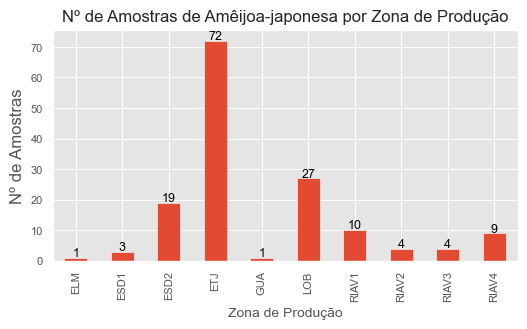

In [215]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=aj_japon_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Amêijoa-japonesa por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

Analisando a figura acima podemos verificar que a zona de produção ETJ destaca-se na monitorização de amêijo-boa com um número de amostras de 72, seguindo-se a zona LOB e RIAV com 27 e a zona ESD com 22. Por este mesmo motivo e com o objetivo de estudar se de facto a concentração de chumbo de amêijo-boa varia consoante com a zona de produção, serão estudas as zonas referidas anteriormente.

In [216]:
#aj_japon_zonas_est= aj_japon[ (aj_japon["Zona de Produção"]=="ETJ") | (aj_japon["Zona de Produção"]=="LOB") | (aj_japon["Zona de Produção"]=="RIAV") | (aj_japon["Zona de Produção"]=="ESD") ]

In [217]:
#sns.boxplot(x="Zona de Produção",y="Pb (mg/kg)", data=aj_japon_zonas_est)

In [218]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

Tal como referido anteriormente, no que concerne à Amêijo-japonesa destaca-se a zona de produção ETJ, pelo que neste tópico será analisa a referida zona de produção

## Lambujinha

In [219]:
lambj=ipma[ipma["Espécie"]=="Lambujinha"]
lambj.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022,Chuvosa
192,253/22,2022-03-29,ESD2,Palma,Lambujinha,0.42,Conforme,29,3,Março,2022,Chuvosa
244,128/22,2022-02-22,ESD1,Zambujal,Lambujinha,0.62,Conforme,22,2,Fevereiro,2022,Chuvosa
259,30/22,2022-01-18,ETJ,Samouco,Lambujinha,2.00,Não Conforme,18,1,Janeiro,2022,Chuvosa
307,953/21,2021-10-19,ETJ,Samouco,Lambujinha,1.50,Não Conforme,19,10,Outobro,2021,Chuvosa


In [220]:
skim(lambj)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 152    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Pb (mg/kg)         │    0 │       0 │     1.8 │    1.2 │    0.01 │    0.76 │     2.8 │     5.6 │  █▆▅▄ ▁   │  │
│ │ Dia                │    0 │       0 │      14 │    7.2 │       1 │       9 │      19 │      30 │  ▄▆▇█▄▂   │  │
│ │ Mês Nº             │    0 │       0 │     6.3 │    3.6 │       1 │       3 │     9.2 │      12 │  ▆▇▅▃█▅   │  │
│ │ Ano                │    0 │       0 │    2000 │    1.9 │    2000 │    2000 │    2000 │    2000 │  ▃▃▇█▇▃   │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2014-10-06     │    2022-11-21     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   150 │  │
│ │ Zona de Produção                 │      0 │         0 │                          1 │                   150 │  │
│ │ Local                            │      0 │         0 │                          1 │                   150 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   150 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   150 │  │
│ │ Mês                              │      0 │         

__Monitorização ao Longo dos Anos__

In [221]:
lambj_st=lambj.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
lambj_st

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Data de colheita,,,,,
2014-12-31,3,2.200000,0.800000,3.0,2.200
2015-12-31,11,2.056364,1.072672,3.8,1.900
2016-12-31,15,1.293333,0.787443,3.0,1.200
2017-12-31,33,1.692424,0.913811,3.7,1.400
2018-12-31,18,2.163889,1.280736,4.8,2.000
2019-12-31,22,1.974091,1.058920,4.5,2.100
2020-12-31,33,1.984848,1.575439,5.6,2.000
2021-12-31,13,1.565385,1.319252,3.6,0.660
2022-12-31,4,0.892500,0.742849,2.0,0.575


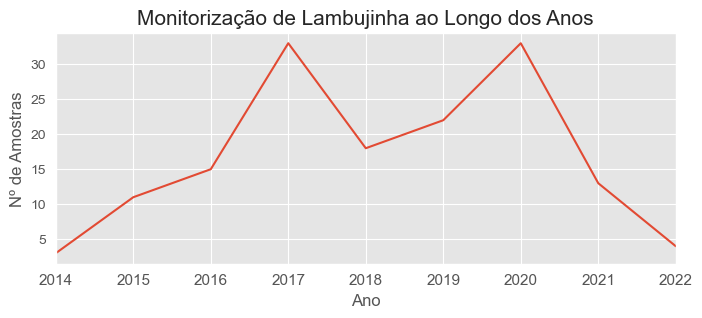

In [222]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
lambj_st["N"].plot()

plt.title("Monitorização de Lambujinha ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

>>>>>>Conclusões

__[Pb] ao Longo dos Anos__

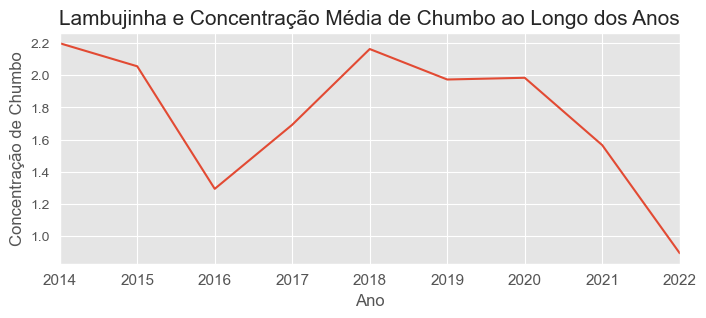

In [223]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
lambj_st["Pb_mean"].plot()

plt.title("Lambujinha e Concentração Média de Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Lambujinha e Concentração de Chumbo ao Longo dos Anos')

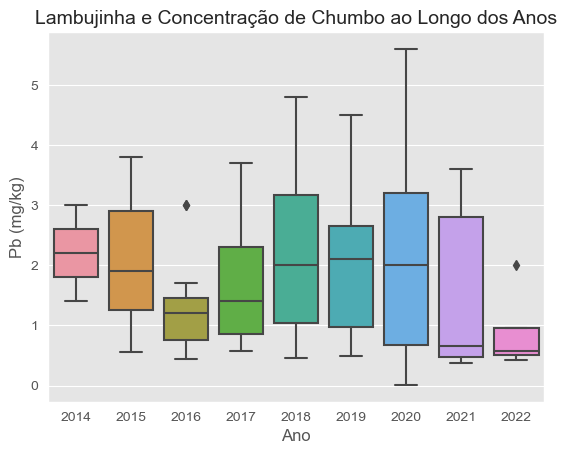

In [224]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=lambj)
plt.title("Lambujinha e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

>>>>>>>>>>Conclusões

__Sazonalidade da Concentração de Chumbo__

In [225]:
lambj_est=lambj.groupby("Estação").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
lambj_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,86,1.710814,1.222687,5.6,1.45
Seca,66,1.956667,1.149135,4.9,1.75


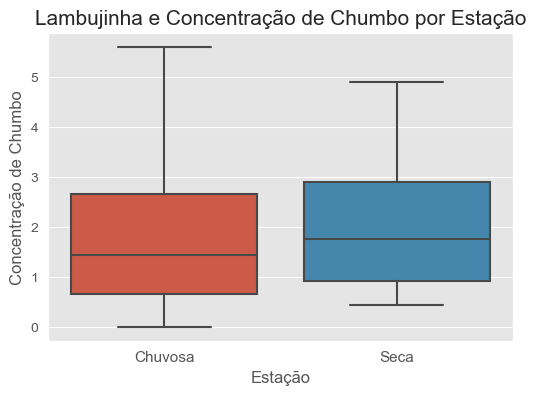

In [226]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=lambj)

plt.title("Lambujinha e Concentração de Chumbo por Estação",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [227]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__-Variação da [Pb] por Zona de Produção__

In [228]:
lambj_zona=lambj.groupby("Zona de Produção").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
lambj_zona.sort_values(by="N",ascending=False)

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Zona de Produção,,,,,
ETJ,70,2.882857,0.865267,5.6,2.85
ESD2,32,0.843437,0.358191,1.6,0.77
ESD1,30,0.680000,0.250186,1.4,0.65
EMN,20,1.354000,0.501885,2.3,1.35


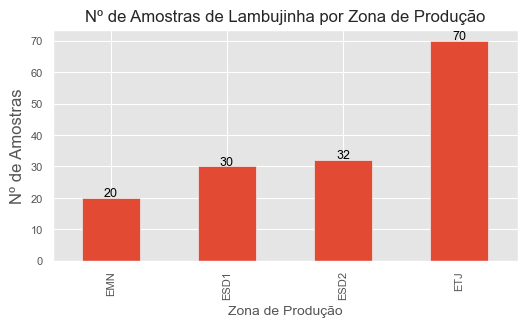

In [229]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=lambj_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Lambujinha por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

Analisando a figura acima podemos verificar que a zona de produção ETJ destaca-se na monitorização de amêijo-boa com um número de amostras de 70, seguindo-se a zona ESD e EMN com 20. Por este mesmo motivo e com o objetivo de estudar se de facto a concentração de chumbo de amêijo-boa varia consoante com a zona de produção, serão estudas as zonas referidas anteriormente.

In [230]:
#lambj_zonas_est= lambj[ (lambj["Zona de Produção"]=="ESD") | (lambj["Zona de Produção"]=="ETJ") | (lambj["Zona de Produção"]=="EMN") ]

In [231]:
#sns.boxplot(x="Zona de Produção", y="Pb (mg/kg)", data=lambj_zonas_est)

In [232]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

Tal como referido anteriormente, no que concerne à Lambujinha destaca-se a zona de produção ETJ, pelo que neste tópico será analisa a referida zona de produção

## Mexilhão

In [233]:
mex=ipma[ipma["Espécie"]=="Mexilhão"]
mex.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
16,1062/22,2022-10-07,L8,APARMONA-Offshore,Mexilhão,0.22,Conforme,7,10,Outobro,2022,Chuvosa
17,1061/22,2022-10-06,L7a,Praia da Amoreira,Mexilhão,0.17,Conforme,6,10,Outobro,2022,Chuvosa
27,1047/22,2022-09-28,L1,Carreço,Mexilhão,0.18,Conforme,28,9,Setembro,2022,Seca
30,1024/22,2022-09-27,L2,Leça da Palmeira,Mexilhão,0.14,Conforme,27,9,Setembro,2022,Seca
31,1016/22,2022-09-26,L5a,Praia dos Coxos,Mexilhão,0.15,Conforme,26,9,Setembro,2022,Seca


In [234]:
skim(mex)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 227    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)         │    0 │       0 │    0.19 │    0.12 │    0.01 │    0.11 │    0.24 │    0.66 │   ▄█▃▁   │  │
│ │ Dia                │    0 │       0 │      12 │       8 │       1 │       6 │      18 │      31 │  ▇█▅▄▂▂  │  │
│ │ Mês Nº             │    0 │       0 │     6.2 │     3.1 │       1 │       3 │       9 │      12 │   █▁ █   │  │
│ │ Ano                │    0 │       0 │    2000 │     2.4 │    2000 │    2000 │    2000 │    2000 │  ▂▁▁▃▂█  │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2014-12-11     │    2022-10-07     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   230 │  │
│ │ Zona de Produção                 │      6 │       2.6 │                          1 │                   230 │  │
│ │ Local                            │      0 │         0 │                          1 │                   230 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   230 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   230 │  │
│ │ Mês                              │      0 │         

__Monitorização ao Longo dos Anos__

In [235]:
mex_st=mex.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
mex_st

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Data de colheita,,,,,
2014-12-31,1,0.200000,NaN,0.20,0.200
2015-12-31,23,0.183478,0.123752,0.58,0.160
2016-12-31,16,0.222500,0.100764,0.42,0.190
2017-12-31,14,0.270000,0.180853,0.66,0.210
2018-12-31,19,0.225789,0.134632,0.57,0.210
2019-12-31,19,0.207368,0.148468,0.60,0.150
2020-12-31,32,0.175625,0.096284,0.50,0.170
2021-12-31,53,0.150943,0.102606,0.42,0.150
2022-12-31,50,0.194400,0.112107,0.60,0.185


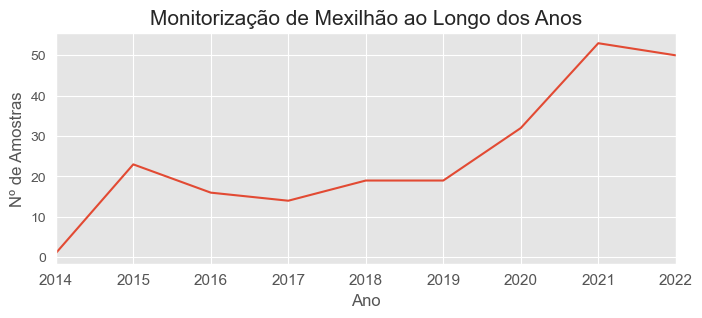

In [236]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
mex_st["N"].plot()

plt.title("Monitorização de Mexilhão ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

>>>>>>>>>>Conclusões

__[Pb] ao Longo dos Anos__

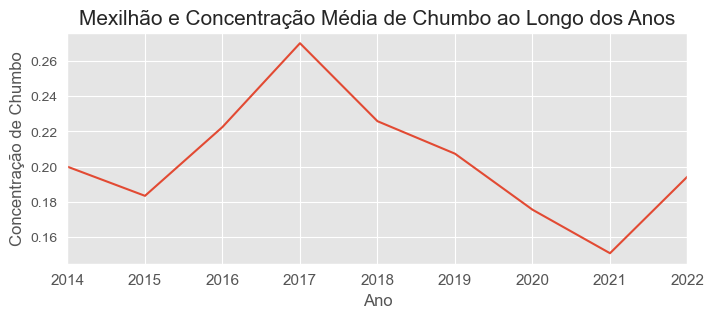

In [237]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
mex_st["Pb_mean"].plot()

plt.title("Mexilhão e Concentração Média de Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Mexilhão e Concentração de Chumbo ao Longo dos Anos')

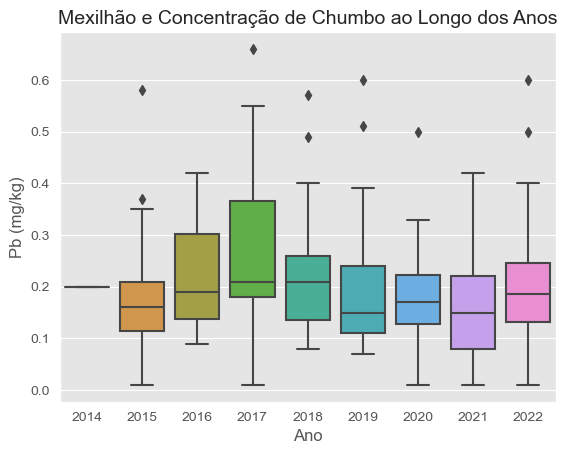

In [238]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=mex)
plt.title("Mexilhão e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

>>>>>>>>>>Conclusões

__Sazonalidade da Concentração de Chumbo__

In [239]:
mex_est=mex.groupby("Estação").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
mex_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,116,0.200172,0.115261,0.60,0.18
Seca,111,0.181171,0.126697,0.66,0.16


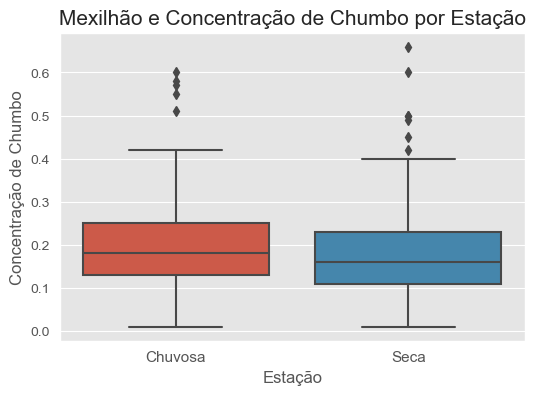

In [240]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=mex)

plt.title("Mexilhão e Concentração de Chumbo por Estação",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [241]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Variação da [Pb] por Zona de Produção__

In [242]:
mex_zona=mex.groupby("Zona de Produção").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
mex_zona.sort_values(by="N",ascending=False)

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Zona de Produção,,,,,
ETJ,16,0.297500,0.079289,0.45,0.280
LAL,16,0.103125,0.124296,0.49,0.075
L4,15,0.171333,0.043567,0.25,0.150
LOB,14,0.062143,0.156263,0.60,0.010
L1,14,0.160000,0.064211,0.28,0.160
L7a,14,0.157143,0.067872,0.25,0.175
L7c1,12,0.142500,0.050114,0.26,0.140
L5a,10,0.205000,0.044535,0.28,0.200
L5b,10,0.439000,0.117421,0.60,0.450


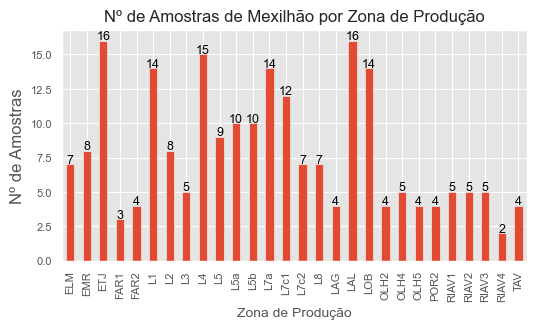

In [243]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=mex_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Mexilhão por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

In [244]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

## Ostra-japonesa

In [245]:
ostra_japon=ipma[ipma["Espécie"]=="Ostra-japonesa"]
ostra_japon.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
18,1038/22,2022-09-28,ELM,Montante Ponte Eiffel 1,Ostra-japonesa,0.10,Conforme,28,9,Setembro,2022,Seca
34,1004/22,2022-09-21,RIAV2,Viveiros da Costa Nova,Ostra-japonesa,0.14,Conforme,21,9,Setembro,2022,Seca
35,1005/22,2022-09-21,RIAV4,Corte das Freiras,Ostra-japonesa,0.21,Conforme,21,9,Setembro,2022,Seca
58,967/22,2022-09-14,FUZ,Fuzeta 1,Ostra-japonesa,0.15,Conforme,14,9,Setembro,2022,Seca
61,935/22,2022-09-13,EMN,Moleiras II,Ostra-japonesa,0.09,Conforme,13,9,Setembro,2022,Seca


In [246]:
skim(ostra_japon)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 234    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd        ┃ p0      ┃ p25     ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)        │    0 │       0 │    0.13 │     0.055 │    0.01 │    0.09 │    0.16 │   0.34 │  ▂▇█▃▁   │  │
│ │ Dia               │    0 │       0 │      15 │       8.5 │       1 │       8 │      22 │     31 │  ▆██▆▆▆  │  │
│ │ Mês Nº            │    0 │       0 │     6.1 │       3.1 │       1 │       3 │       9 │     12 │   █▁ █▁  │  │
│ │ Ano               │    0 │       0 │    2000 │       1.8 │    2000 │    2000 │    2000 │   2000 │  ▃▅▆▆▅█  │  │
│ └───────────────────┴──────┴─────────┴─────────┴───────────┴─────────┴─────────┴─────────┴────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2015-03-03     │    2022-09-28     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   230 │  │
│ │ Zona de Produção                 │      0 │         0 │                          1 │                   230 │  │
│ │ Local                            │      0 │         0 │                          1 │                   230 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   230 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   230 │  │
│ │ Mês                              │      0 │         

__Monitorização de Chumbo ao Longo dos Anos__

In [247]:
ostra_japon_st=ostra_japon.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_japon_st

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Data de colheita,,,,,
2015-12-31,1,0.180000,NaN,0.18,0.180
2016-12-31,18,0.146667,0.054665,0.25,0.140
2017-12-31,37,0.151081,0.053322,0.34,0.150
2018-12-31,43,0.141628,0.046951,0.23,0.140
2019-12-31,41,0.115122,0.053578,0.29,0.110
2020-12-31,36,0.108333,0.055831,0.26,0.100
2021-12-31,32,0.097500,0.061487,0.24,0.100
2022-12-31,26,0.131538,0.041250,0.21,0.135


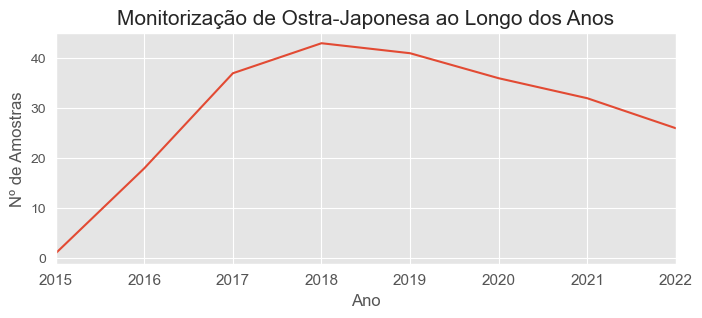

In [248]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
ostra_japon_st["N"].plot()

plt.title("Monitorização de Ostra-Japonesa ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

>>>Conclusões

__[Pb] ao Longo dos Anos__

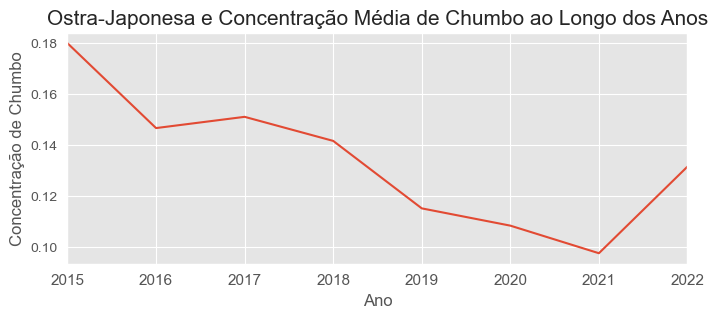

In [249]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
ostra_japon_st["Pb_mean"].plot()

plt.title("Ostra-Japonesa e Concentração Média de Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Ostra-japonesa e Concentração de Chumbo ao Longo dos Anos')

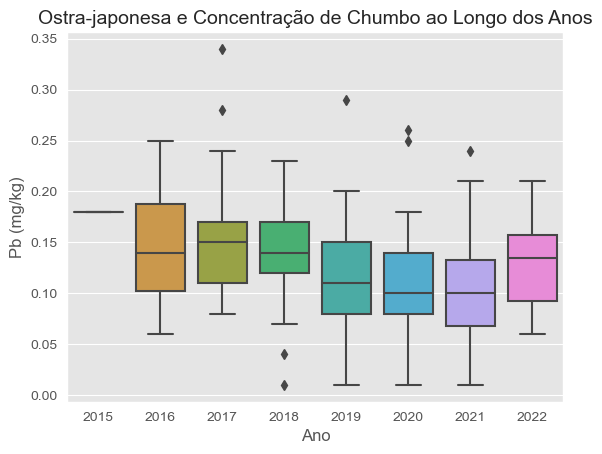

In [250]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=ostra_japon)
plt.title("Ostra-japonesa e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

>>>Conclusões

__Sazonalidade da Concentração de Chumbo__

In [251]:
ostra_japon_est=ostra_japon.groupby("Estação").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_japon_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,126,0.128968,0.059570,0.34,0.13
Seca,108,0.124167,0.050384,0.23,0.13


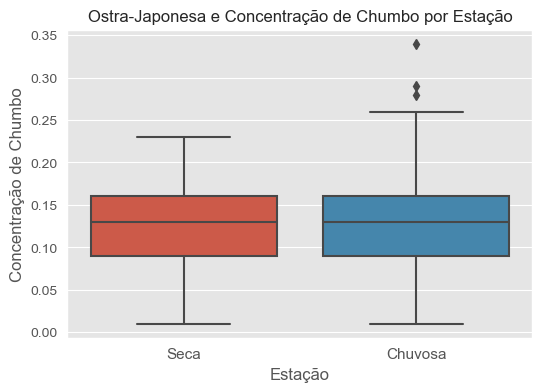

In [252]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=ostra_japon)

plt.title("Ostra-Japonesa e Concentração de Chumbo por Estação",fontsize=12)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [253]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Variação da [Pb] por Zona de Produção__ 

In [254]:
ostra_japon_zona=ostra_japon.groupby("Zona de Produção").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_japon_zona.sort_values(by="N",ascending=False)

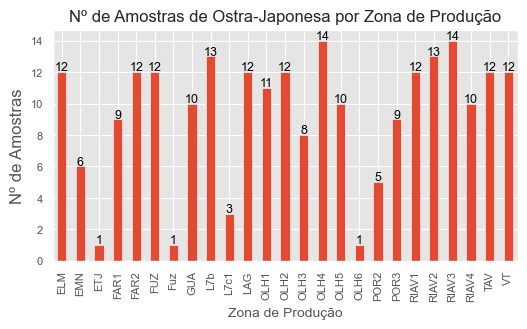

In [255]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=ostra_japon_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Ostra-Japonesa por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

In [256]:
# Análise Estatítica no R---Verificar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

## Ostra-portuguesa

In [257]:
ostra_tuga=ipma[ipma["Espécie"]=="Ostra-portuguesa"]
ostra_tuga.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1,Janeiro,2023,Chuvosa
1,21/23,2023-01-10,ETJ,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023,Chuvosa
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12,Dezembro,2022,Chuvosa
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11,Novembro,2022,Chuvosa
11,1137/22,2022-10-24,EMR,Roncanito,Ostra-portuguesa,0.07,Conforme,24,10,Outobro,2022,Chuvosa


In [258]:
skim(ostra_tuga)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 210    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd       ┃ p0      ┃ p25      ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pb (mg/kg)        │    0 │       0 │    0.11 │    0.067 │    0.01 │    0.073 │    0.15 │   0.36 │  ▃█▆▁ ▁  │  │
│ │ Dia               │    0 │       0 │      15 │      7.2 │       1 │       10 │      19 │     30 │  ▄▅██▄▃  │  │
│ │ Mês Nº            │    0 │       0 │     6.7 │      3.4 │       1 │        3 │       9 │     12 │  ▄▇▄▅█▅  │  │
│ │ Ano               │    0 │       0 │    2000 │      2.5 │    2000 │     2000 │    2000 │   2000 │  █▃▇▂▅▃  │  │
│ └───────────────────┴──────┴─────────┴─────────┴──────────┴─────────┴──────────┴─────────┴────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %     ┃ first              ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Data de colheita             │     0 │        0 │     2014-10-22     │    2023-01-30     │ None            │  │
│ └──────────────────────────────┴───────┴──────────┴────────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Nº Amostra                       │      0 │         0 │                          1 │                   210 │  │
│ │ Zona de Produção                 │      0 │         0 │                          1 │                   210 │  │
│ │ Local                            │      0 │         0 │                          1 │                   210 │  │
│ │ Espécie                          │      0 │         0 │                          1 │                   210 │  │
│ │ Observações                      │      0 │         0 │                          1 │                   210 │  │
│ │ Mês                              │      0 │         

__Monitorização ao Longo dos Anos__

In [259]:
ostra_tuga_st=ostra_tuga.groupby(pd.Grouper(key="Data de colheita",freq="Y")).agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_tuga_st

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Data de colheita,,,,,
2014-12-31,6,0.208333,0.133629,0.36,0.200
2015-12-31,54,0.132222,0.057615,0.33,0.130
2016-12-31,25,0.131200,0.073219,0.34,0.120
2017-12-31,26,0.127308,0.041334,0.18,0.130
2018-12-31,24,0.111250,0.042150,0.18,0.115
2019-12-31,15,0.115333,0.062663,0.32,0.110
2020-12-31,20,0.099500,0.047846,0.17,0.110
2021-12-31,19,0.061579,0.048335,0.14,0.060
2022-12-31,19,0.068947,0.080753,0.31,0.010


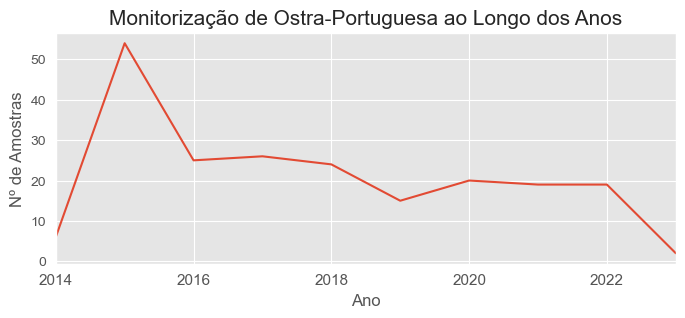

In [260]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
ostra_tuga_st["N"].plot()

plt.title("Monitorização de Ostra-Portuguesa ao Longo dos Anos",fontsize=15)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

>>>Conclusões

__[Pb] ao Longo dos Anos__

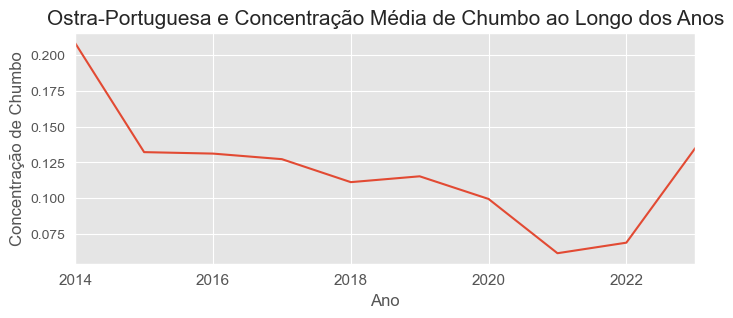

In [261]:
plt.figure(figsize=(8,3))
plt.style.use("ggplot")
ostra_tuga_st["Pb_mean"].plot()

plt.title("Ostra-Portuguesa e Concentração Média de Chumbo ao Longo dos Anos",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Ano",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

Text(0.5, 1.0, 'Ostra-Portuguesa e Concentração de Chumbo ao Longo dos Anos')

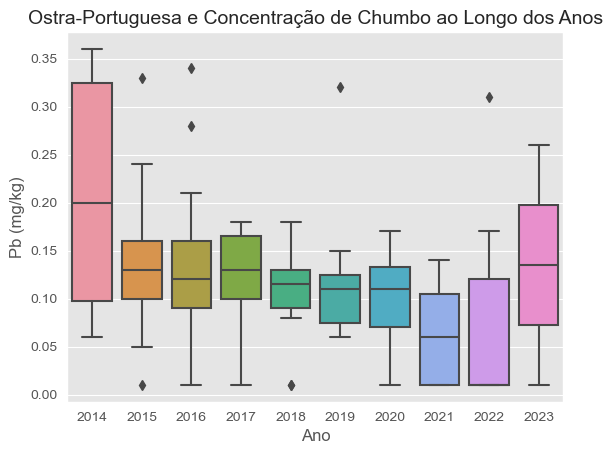

In [262]:
sns.boxplot(x="Ano",y="Pb (mg/kg)",data=ostra_tuga)
plt.title("Ostra-Portuguesa e Concentração de Chumbo ao Longo dos Anos",fontsize=14)

>>>Conclusões

__Sazonalidade da Concentração de Chumbo__

In [263]:
ostra_tuga_est=ostra_tuga.groupby("Estação").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_tuga_est

,N,Pb_mean,Pb_std,Pb_max,Pb_median
Estação,,,,,
Chuvosa,105,0.116190,0.075846,0.36,0.11
Seca,105,0.113524,0.057779,0.33,0.12


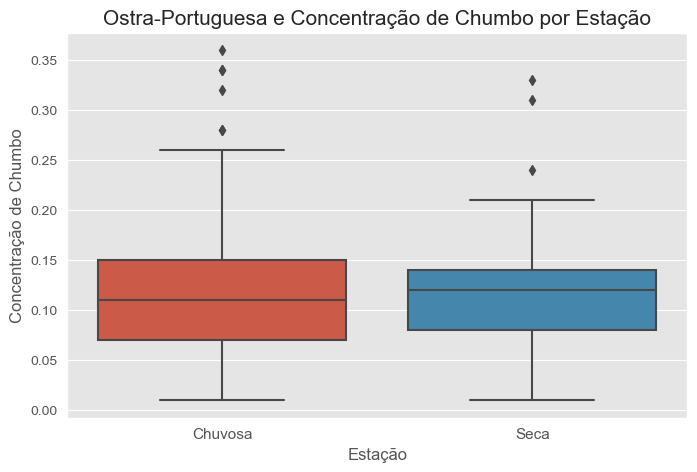

In [264]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Estação",y="Pb (mg/kg)",data=ostra_tuga)

plt.title("Ostra-Portuguesa e Concentração de Chumbo por Estação",fontsize=15)
plt.ylabel("Concentração de Chumbo",fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Estação",fontsize=12)
plt.xticks(fontsize=11)

plt.show()

In [265]:
# Análise Estatística no R--- Verficar se existem diferenças significativas

__Variação da [Pb] por Zona de Produção__

In [272]:
ostra_tuga_zona=ostra_tuga.groupby("Zona de Produção").agg(N=("Data de colheita","count"),
                                            Pb_mean=("Pb (mg/kg)","mean"),
                                            Pb_std=("Pb (mg/kg)","std"),
                                            Pb_max=("Pb (mg/kg)","max"),
                                            Pb_median=("Pb (mg/kg)","median"))
ostra_tuga_zona.sort_values(by="N",ascending=False).to_excel("tuga.xlsx")

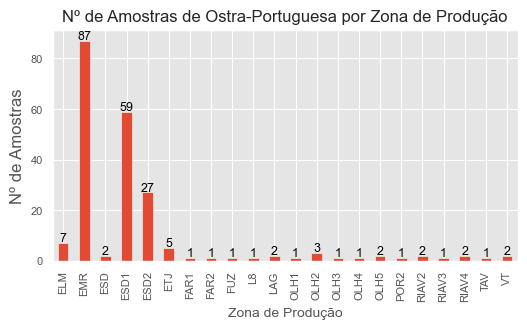

In [267]:
plt.figure(figsize=(6,3))
plt.style.use("ggplot")
plot=ostra_tuga_zona["N"].plot(kind="bar")

plt.title("Nº de Amostras de Ostra-Portuguesa por Zona de Produção", fontsize=12)
plt.xlabel("Zona de Produção",fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel("Nº de Amostras",fontsize=12)
plt.yticks(fontsize=8)

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha="center", va="baseline",fontsize=9,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.show()

In [268]:
# Análise Estatística no R--- Verficar se existem diferenças significativas

__Influência dos Fatores Ambientais na Concentração de Chumbo__

> Temperatura

> Precipitação (?)

In [269]:
ipma.head()

,Nº Amostra,Data de colheita,Zona de Produção,Local,Espécie,Pb (mg/kg),Observações,Dia,Mês Nº,Mês,Ano,Estação
0,65/23,2023-01-30,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,30,1,Janeiro,2023,Chuvosa
1,21/23,2023-01-10,ETJ,Vagem da Cana Verde,Ostra-portuguesa,0.26,Conforme,10,1,Janeiro,2023,Chuvosa
3,1295/22,2022-12-12,EMR,Roncanito,Ostra-portuguesa,0.01,Conforme,12,12,Dezembro,2022,Chuvosa
6,1254/22,2022-11-21,ESD2,Palma,Lambujinha,0.53,Conforme,21,11,Novembro,2022,Chuvosa
7,1187/22,2022-11-08,EMR,Roncanito,Ostra-portuguesa,0.11,Conforme,8,11,Novembro,2022,Chuvosa
